<a href="https://colab.research.google.com/github/Sairindhrijena/Health-Insurance-Cross-Sell-Prediction/blob/main/Health_Insurance_Cross_Sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name-Health-Insurance-Cross-Sell-Prediction**
**Project Type**-Classification

**Contribution**-Indivisual

# **Project Summary**


*  An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss,damage,illness or death in return for the payment of aspecified premium.

*  By building a model to predict whether a customer would be intrested in Vehicle insurance is extremely helpful for a company.After that it can than accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.


*   We have a dataset which contains information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc. related to a person who is interested in vehicle insurance. We have 381109 data points available.












# **GitHub Link :-https://github.com/Sairindhrijena/Health-Insurance-Cross-Sell-Prediction**

# **Problem Statement:-**

> Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.



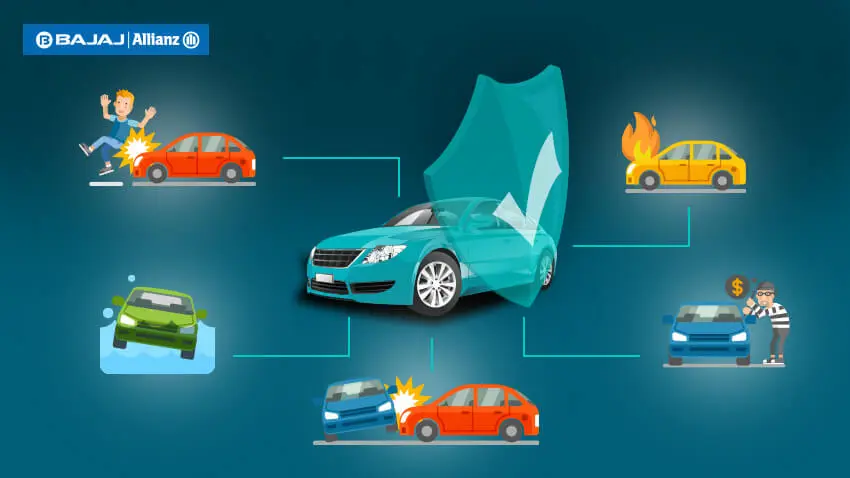

#**Let's Begin**

##**1. Know Your Data**

###**Import Libraries**

In [1]:

# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import warnings;warnings.simplefilter('ignore')
import time

# Used in Hypothesis Testing
from scipy.stats import *
import math

# Used in data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Used in Feature Engineering
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesClassifier

# Used in Data Scaling
from sklearn.preprocessing import StandardScaler

# Used in Splitting data
from sklearn.model_selection import train_test_split

# Used in Oversampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Used in ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
import lightgbm as lgb

# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn import metrics

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
     

###**Dataset Loading**

In [2]:
#Load Dataset
data=pd.read_csv('/content/drive/MyDrive/AlmaBetter/CAPSTONE PROJECT-3/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

###**Dataset First View**

In [3]:
# Dataset First Look
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


###**Dataset Rows & Columns count**

In [4]:

# Dataset Rows & Columns count
rows=data.shape[0]
columns=data.shape[1]
print(f"The no of rows is {rows} and no of columns is {columns}")

The no of rows is 381109 and no of columns is 12


###**Dataset Information**

In [5]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


###**Duplicate Values**

In [6]:
# Dataset Duplicate Value Count
print(f'The number of duplicate rows are {data.duplicated().sum()}')

The number of duplicate rows are 0


###**Missing Values/Null Values**

In [7]:
# Missing Values/Null Values Count
data.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

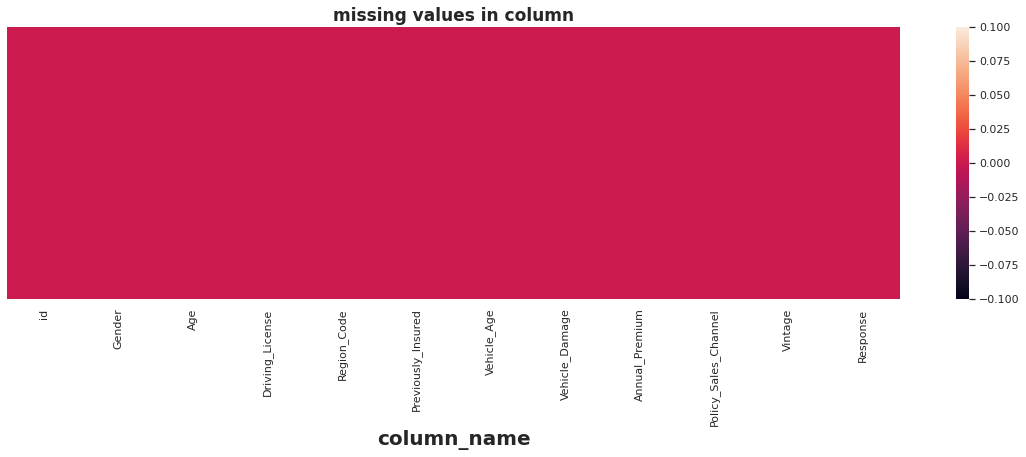

In [8]:
# Visualizing the missing values
plt.figure(figsize=(20, 5))
sns.heatmap(data.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=20, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

###**What did you know about your dataset?**



*   The dataset given is a dataset from Health Insurance industry, and we have to analysis the response of customers and the insights behind it.
*   Sell prediction is analytical studies on the possibility of a customer abandoning service. The goal is to understand and take steps to change it before the costumer gives up the service.


*   The above dataset has 381109 rows and 12 columns. There are no mising values and duplicate values in the dataset.





# **2. Understanding Your Variables**

In [9]:
# Dataset Columns
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [10]:
# Dataset Describe
data.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


###**Dataset Description**



*   **Id:** Unique ID for the customer

*   **Gender:**Male/Female


*    **Age:**Age of the customer

*   **Driving_License:**Customer has DL or not


*   **Region_Code**:Unique code for the region of the customer

*   **Previously_Insured:**Customer already has vehicle insurance or not


*  **Vehicle_Age:**Age of the Vehicle

*   **Vehicle_Damage:**Past Damages present or not

*   **Annual_Premium:**The amount customer needs to pay as premium in the year



*   **PolicySalesChannel:**Anonymized Code for the channel of outreaching to      the customer ie. Different Agents, Over Mail, Over Phone, In Person, 
etc.

*   **Vintage:**Number of Days, Customer has been associated with the company


*   **Response:**Customer is interested or not
















###**Check Unique Values for each variable**

In [11]:
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("No. of unique values in ",i,"is",data[i].nunique(),".")

No. of unique values in  id is 381109 .
No. of unique values in  Gender is 2 .
No. of unique values in  Age is 66 .
No. of unique values in  Driving_License is 2 .
No. of unique values in  Region_Code is 53 .
No. of unique values in  Previously_Insured is 2 .
No. of unique values in  Vehicle_Age is 3 .
No. of unique values in  Vehicle_Damage is 2 .
No. of unique values in  Annual_Premium is 48838 .
No. of unique values in  Policy_Sales_Channel is 155 .
No. of unique values in  Vintage is 290 .
No. of unique values in  Response is 2 .


# **3. Data Wrangling**

###**Data Wrangling Code**

In [12]:
# Write your code to make your dataset analysis ready.
# Assingning numericals column of df to variable numerical_cols
num_cols = list(data.describe())
num_data = data[num_cols]
num_data.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,40454.0,26.0,217,1
1,2,76,1,3.0,0,33536.0,26.0,183,0
2,3,47,1,28.0,0,38294.0,26.0,27,1
3,4,21,1,11.0,1,28619.0,152.0,203,0
4,5,29,1,41.0,1,27496.0,152.0,39,0


In [13]:
# Assingning catagoricals column of df to variable catagorical_cols
cat_cols=list(set(data.columns)-set(num_cols))
cat_data=data[cat_cols]
cat_data.head()

,Vehicle_Age,Vehicle_Damage,Gender
0,> 2 Years,Yes,Male
1,1-2 Year,No,Male
2,> 2 Years,Yes,Male
3,< 1 Year,No,Male
4,< 1 Year,No,Female


In [14]:
#let's check in each column of categorical_df how namy unique values are present
for column_name in cat_cols:
  print('-'*35)
  print(data[column_name].value_counts(),'\n')
  print('-'*35)

-----------------------------------
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64 

-----------------------------------
-----------------------------------
Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64 

-----------------------------------
-----------------------------------
Male      206089
Female    175020
Name: Gender, dtype: int64 

-----------------------------------


In [15]:
data.describe(include='O')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


###**What all manipulations have you done and insights you found?**


In this dataset nothing to do in wrangling .so i just divided the df in two dfs i.e, numerical_df and categorical_df . numerical_df for all the numericals column and categorical_df is for all the categorical columns and i check the categorical_df then i found there are 3 columns i.e gender, vehicle_age and vehicle_damage and there are 2 unique in gender, 3 unique in vehicle_age and 2 unique in vehicle_damage.

## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

###**Chart-1:** **Countplot on dependent variable i.e Response (Univariate)**

0    334399
1     46710
Name: Response, dtype: int64




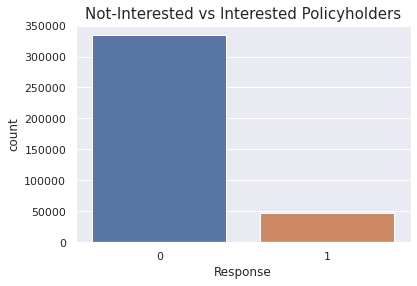

0    0.877437
1    0.122563
Name: Response, dtype: float64

In [16]:
# Chart - 1 visualization code
# Dependent Column Value Counts
print(data.Response.value_counts())
print("\n")
#Dependent Variable Column Visualization
sns.countplot(data.Response)
plt.title('Not-Interested vs Interested Policyholders', fontsize=15)
plt.show()
data.Response.value_counts()/data.shape[0]

 **1. Why did you pick the specific chart?**



*   Countplot used to Show the counts of observations in each categorical bin using bars.
*   To show the count of interested and not-interested of policyholders , So i have used Countplot.

**2. What is/are the insight(s) found from the chart?**



*   The dependant variable has binary values of 0 and 1. We can infer from the plot above that many clients have no interest in purchasing vehicle insurance.


*  12.22 percent of the data are 1's and 87.78 percent of the data are 0's. This data must be handled using the imbalance technique since the output feature is imbalanced.




   **3. Will the gained insights help creating a positive business impact?**



Are there any insights that lead to negative growth? Justify with specific reason.



*   No, the gained insights help a positive business impact.


* No, there are no such insights that lead to negative growth.



### **Chart - 2 : Piechart on independent variable i.e Gender (Univariate)**

Male      206089
Female    175020
Name: Gender, dtype: int64




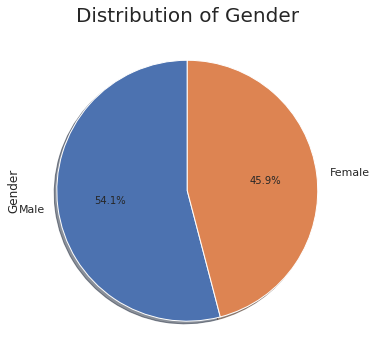

In [17]:
# Chart - 2 visualization code
# Independent Column Value Counts
print(data.Gender.value_counts())
print("\n")
# Independent Variable Column Visualization
data['Gender'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               explode=[0,0]
                              )
plt.title('Distribution of Gender',fontsize=20)
plt.show()

**1. Why did you pick the specific chart?**



*   A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors.
*   Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the Gender.



**2. What is/are the insight(s) found from the chart?**

From the above pie chart i found there are 206089 male i.e (54.1 %) and 175020 female i.e (45.9 %). So , we can say that gender variable is almost equally distributed but male are liitle bit more in comparison to female.

**3.Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.



*  No, the gained insights help a positive business impact.
*   No, there are no such insights that lead to negative growth



###**Chart - 3 : Countplot on independent variable i.e Previously_Insured (Univariate)**

0    206481
1    174628
Name: Previously_Insured, dtype: int64




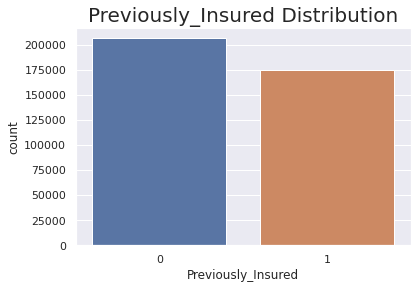

In [18]:
# Chart - 3 visualization code
# Independent Column Value Counts
print(data.Previously_Insured.value_counts())
print('\n')

# Independent Variable Column Visualization
sns.countplot(data.Previously_Insured)
plt.title('Previously_Insured Distribution',fontsize=20)
plt.show()
     

**1. Why did you pick the specific chart?**



*   Countplot show the frequency, count of values for the different levels of a categorical variable.


*   To show the Vehicle Previously Insured. I have used countplot.



**2. What is/are the insight(s) found from the chart?**

From the above countplot, i found that there ar 206481 those people who not insured previously and 174628 are those people who insured previously, which is almost equally distributed but Previously Insured people are little bit more in comparison to not insured people.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.



*   No, the gained insights didn't create a positive business impact.

*   No, there are no such insights that lead to negative growth.



###**Chart - 4 : Piechart on independent variable i.e Vehicle_Damage (Univariate)**

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64




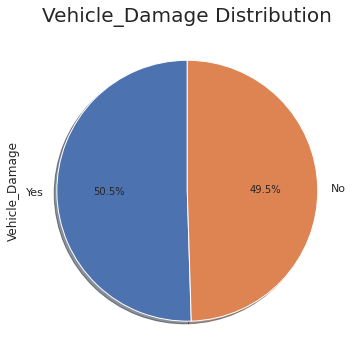

In [19]:
# Chart - 4 visualization code
# Independent Column Value Counts
print(data.Vehicle_Damage.value_counts())
print('\n')

# Independent Variable Column Visualization
data['Vehicle_Damage'].value_counts().plot(kind='pie',
                                         figsize=(15,6),
                                         autopct='%1.1f%%',
                                         startangle=90,
                                         shadow=True,
                                         explode=(0,0))
plt.title('Vehicle_Damage Distribution',fontsize=20)
plt.show()



  **1. Why did you pick the specific chart?**





*   A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors.

*  Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the Vehicle Damage.



**2. What is/are the insight(s) found from the chart?**

From the above pie chart i found there are 192413 i.e (50.5 %) people whose vrhicle is damage and 188696 i.e (49.5 %) are those people whose vehicle is not damage. So , we can say that Vehicle_Damage variable is almost equally distributed.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.



*   No, the gained insights didn't create a positive business impact.

*   No, there are no such insights that lead to negative growth.



###**Chart - 5: Countplot on independent variable i.e Driving_License (Univariate)**

1    380297
0       812
Name: Driving_License, dtype: int64




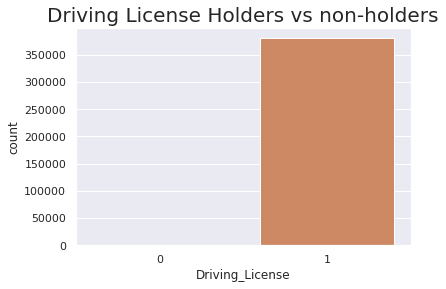

In [20]:
# Chart - 6 visualization code
# Independent Column Value Counts
print(data.Driving_License.value_counts())
print('\n')

# Independent Variable Column Visualization
sns.countplot(data.Driving_License)
plt.title('Driving License Holders vs non-holders',fontsize=20)
plt.show()

**1. Why did you pick the specific chart?**



*   Countplot show the frequency, count of values for the different levels of a categorical variable.

*   To show the Driving License holders vs non holders. I have used countplot.



**2. What is/are the insight(s) found from the chart?**

From the above countplot i found their are 380297 people those who have the driving license and 812 people are not having driving license. So , we can say that driving license variable is almost equally distributed.

**3. Will the gained insights help creating a positive business impact?**



 Are there any insights that lead to negative growth? Justify with specific reason.






*   No, the gained insights didn't create a positive business impact.

*   No, there are no such insights that lead to negative growth.



###**Chart - 6 : Countplot on independent variable i.e Vehicle_Age (Univariate)**

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64




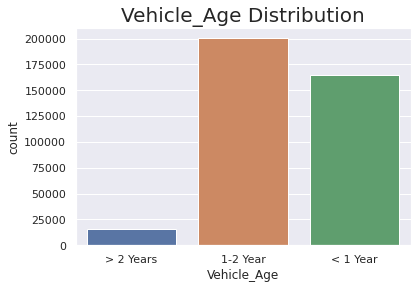

In [21]:
# Chart - 5 visualization code
# Independent Column Value Counts
print(data.Vehicle_Age.value_counts())
print('\n')

# Independent Variable Column Visualization
sns.countplot(data.Vehicle_Age)
plt.title('Vehicle_Age Distribution',fontsize=20)
plt.show()

**1. Why did you pick the specific chart?**



*   Countplot show the frequency, count of values for the different levels of a categorical variable.

*   To show the Vehicle age distribution. I have used countplot.



**2. What is/are the insight(s) found from the chart?**

From the above countplot, we can say that most of the people having those vehicle whose age in range 1-2 years in comparison others two.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.



*   No, the gained insights didn't create a positive business impact.

*   No, there are no such insights that lead to negative growth.



###**Chart - 7 : Countplot on Vehicle_Damage Vs Response (Bivariate)**

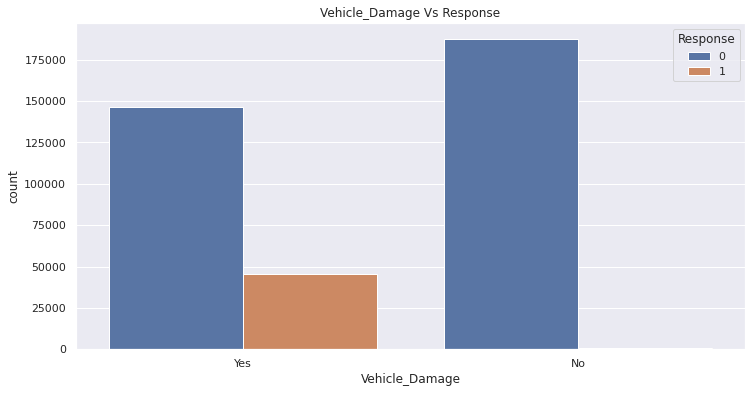

In [22]:
# Chart - 8 visualization code
plt.figure(figsize=(12,6))
sns.countplot(x='Vehicle_Damage',hue='Response',data=data)
plt.title('Vehicle_Damage Vs Response')
plt.show()

**1. Why did you pick the specific chart?**



*   Countplot show the frequency, count of values for the different levels of a categorical variable.

*   To show the Vehicle Damage Vs Response. I have used countplot.



**2. What is/are the insight(s) found from the chart?**

We can infer from the above plot that those people whose vehicle is damage are taking insurence more in comparison those who's vehicle are not damaged.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.



*   Yes, the gained insights help to create a positive impact on business because on the basis of above analysis, we can target those people whose vehicles are damaged.

*   No, there are no such insights that lead to negative growth.



###**Chart - 8 : Countplot on response based on gender (Bivariate)**

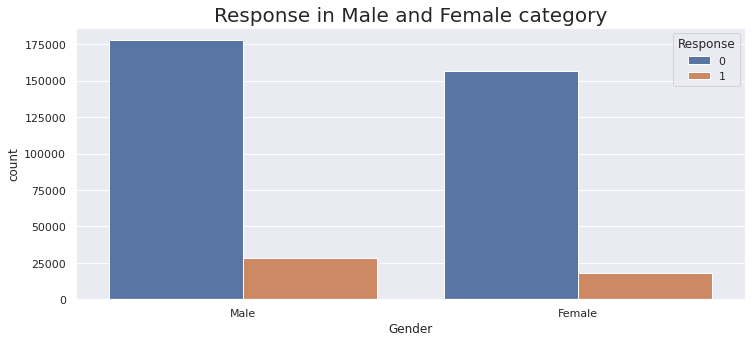

In [23]:
# Chart - 7 visualization code
#Analyzing responses based on gender
plt.figure(figsize = (12,5))
sns.countplot(data['Gender'], hue= data['Response'])
plt.title('Response in Male and Female category', fontsize=20)
plt.show()

**1. Why did you pick the specific chart?**



*   Countplot show the frequency, count of values for the different levels of a categorical variable.

*   To show the response on gender. I have used countplot.



**2. What is/are the insight(s) found from the chart?**

From the above countplot, We can see that males are more likely to purchase vehicle insurance.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.



*   Yes, the gained insights help to create a positive impact on business because the males are more likely to purchase vehicle insurance.

*   No, there are no such insights that lead to negative growth.



###**Chart - 9 : Countplot on Region code Vs Response (Bivariate)**

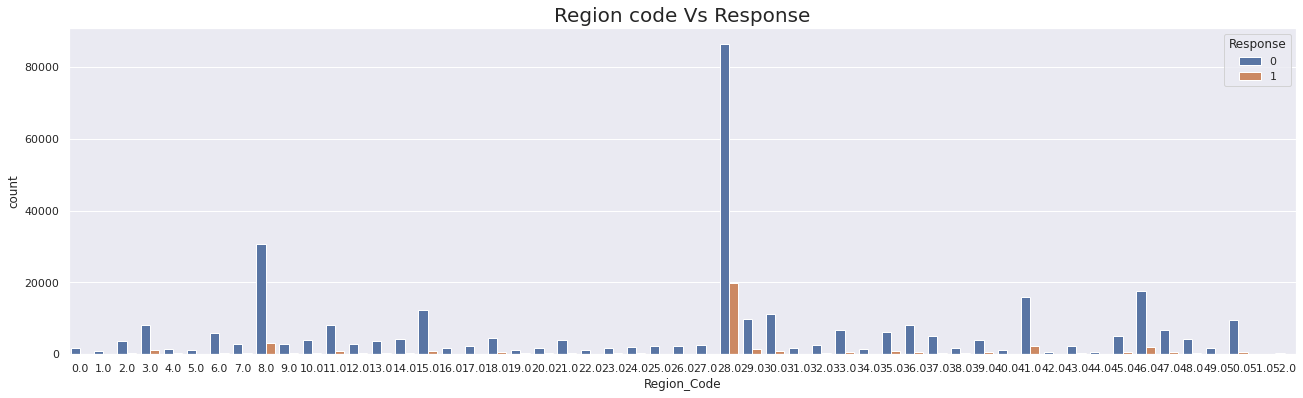

In [24]:
# Chart - 9 visualization code
plt.figure(figsize=(22,6))
sns.countplot(x='Region_Code',hue='Response',data=data)
plt.title('Region code Vs Response',fontsize=20)
plt.show()

**1. Why did you pick the specific chart?**



*   Countplot show the frequency, count of values for the different levels of a categorical variable.


*   To show the Previously Insured Vs Response. I have used countplot.



**2. What is/are the insight(s) found from the chart?**

From the above graph, i found that the Region Code - 0.28 has more customers in comparison to others region codes.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.



*   Yes, the gained insights help to create a positive impact on business because on the basis of above analysis, we can target the people of region code 0.28.

*   No, there are no such insights that lead to negative growth.



###**Chart - 10 : Countplot on Vehicle age Vs Response (Bivariate)**

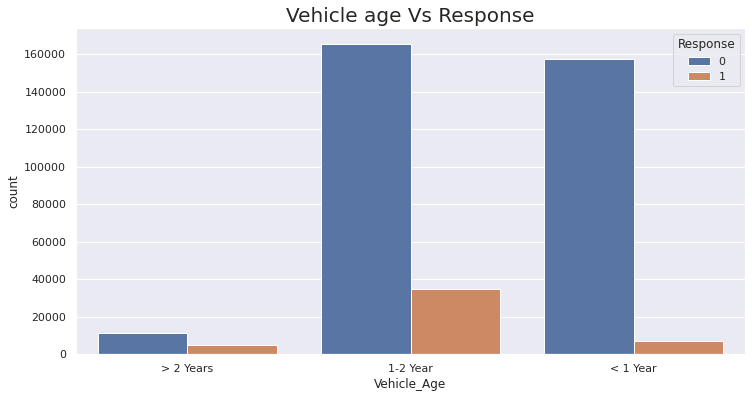

In [25]:
# Chart - 10 visualization code
plt.figure(figsize=(12,6))
sns.countplot(x='Vehicle_Age',hue='Response',data=data)
plt.title('Vehicle age Vs Response',fontsize=20)
plt.show()

**1. Why did you pick the specific chart?**



*   Countplot show the frequency, count of values for the different levels of a categorical variable

*   To show the Previously Insured Vs Response. I have used countplot.



**2. What is/are the insight(s) found from the chart?**

From the above graph, we can say that customers whose vehicle age is between 1-2 years are most likely to be interested when compared to the other two.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.



*   Yes, the gained insights help to create a positive impact on business because on the basis of above analysis, we have a lower number of policyholders with vehicles older than two years, so we must focus more on the other two categories. 

*   No, there are no such insights that lead to negative growth.



###**Chart - 11 : Countplot on Driving License Vs Response (Bivariate)**

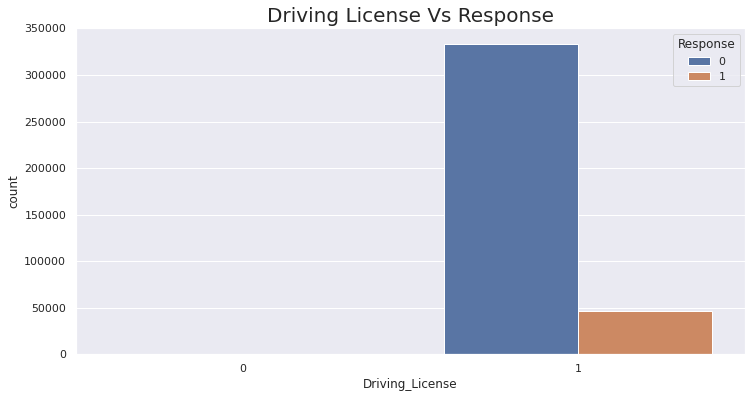

In [26]:
# Chart - 12 visualization code
plt.figure(figsize=(12,6))
sns.countplot(x='Driving_License',hue='Response',data=data)
plt.title('Driving License Vs Response',fontsize=20)
plt.show()

**1. Why did you pick the specific chart?**



*   ountplot show the frequency, count of values for the different levels of a categorical variable.

*   To show the Driving License Vs Response. I have used countplot.



**2. What is/are the insight(s) found from the chart?**

From the above countplot, we can say that, Customers who are interested in Vehicle insurance are almost having the driving license.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.



*   Yes, the gained insights help to create a positive impact on business because on the basis of above analysis we can target those peoples who are having driving license.


*   No, there are no such insights that lead to negative growth.



###**Chart - 12 : Countplot on Previously Insured Vs Response (Bivariate).**

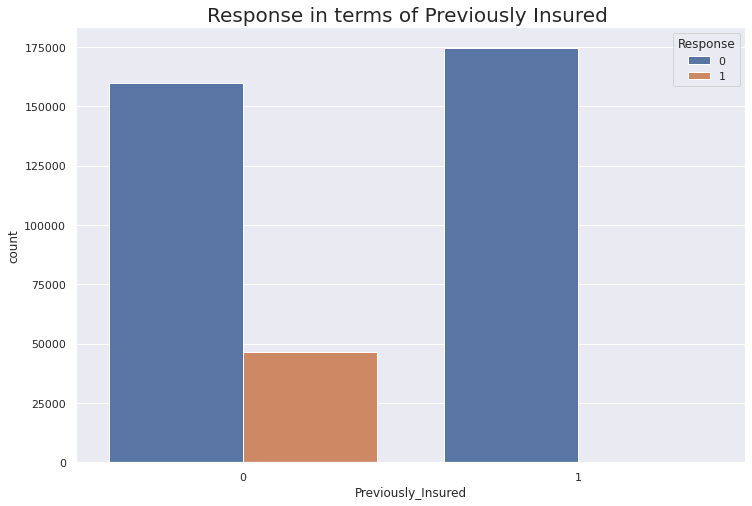

In [27]:
# Chart - 11 visualization code
#In Previously_Insured 1 means Customer already has Vehicle Insurance and 0 means Customer doesn't have Vehicle Insurance yet
plt.figure(figsize=(12,8))
sns.countplot(x="Previously_Insured",hue ="Response",data=data)
plt.title('Response in terms of Previously Insured ', fontsize=20)
plt.show()

**1. Why did you pick the specific chart?**



*   Countplot show the frequency, count of values for the different levels of a categorical variable.

*   To show the Previously Insured Vs Response. I have used countplot.



**2. What is/are the insight(s) found from the chart?**

From the above count-plot, we found that their are almost everyone is purchase insurence those are previously insured.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.





*   Yes, the gained insights help to create a positive impact on business because on the basis of above analysis we can target those peoples who are having Previously insured.

*   No, there are no such insights that lead to negative growth.



###**Chart - 13 : Countplot on Age Vs Response (Bivariate)**

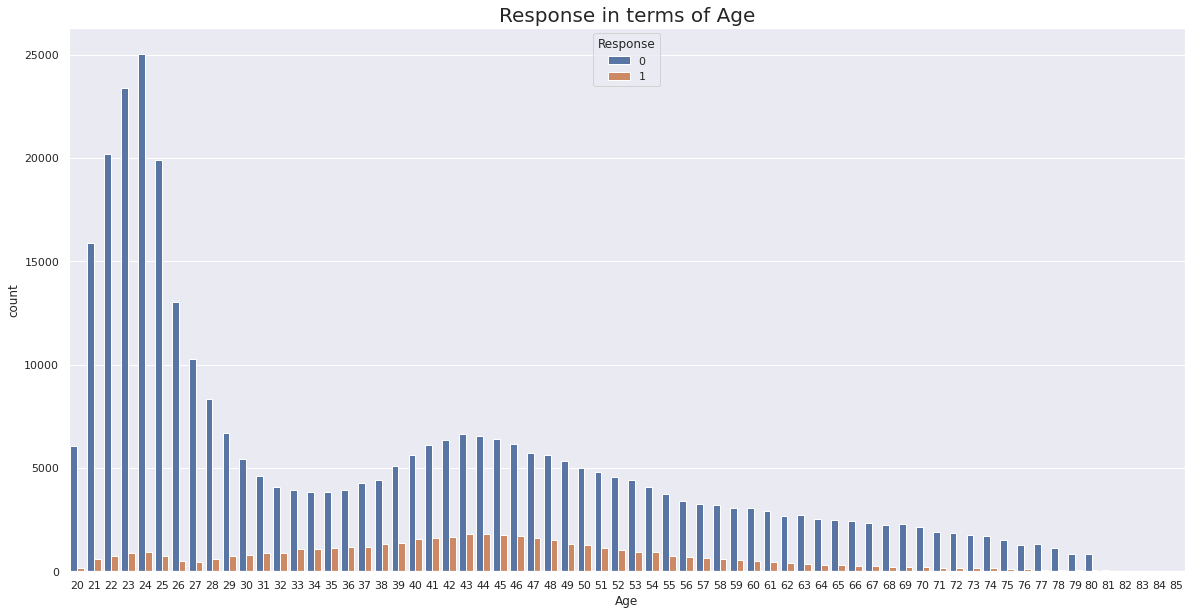

In [28]:
# Chart - 13 visualization code
plt.figure(figsize = (20,10))
sns.countplot(x='Age', hue='Response', data=data)
plt.title('Response in terms of Age', fontsize=20)
plt.show()

**1. Why did you pick the specific chart?**



*   Countplot show the frequency, count of values for the different levels of a categorical variable.

* Also count plot is used to represent the counts of the observation present in the categorical variable 



**2. What is/are the insight(s) found from the chart?**



*   From this chart we can see here people below 30 age are not more intrested
in vehicle insurance,reason may be lack of experience,less maturity and the don't have more expensive vehicles yet.

* People aged between 30-60 are more likely to be interested.



**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.



*   yes, the gained insights help to create a positive impact on business because on the basis of above analysis we can target those peoples whose age in between 30-60.


*   No, there are no such insights that lead to negative growth.



###**Chart - 14 - Correlation Heatmap**

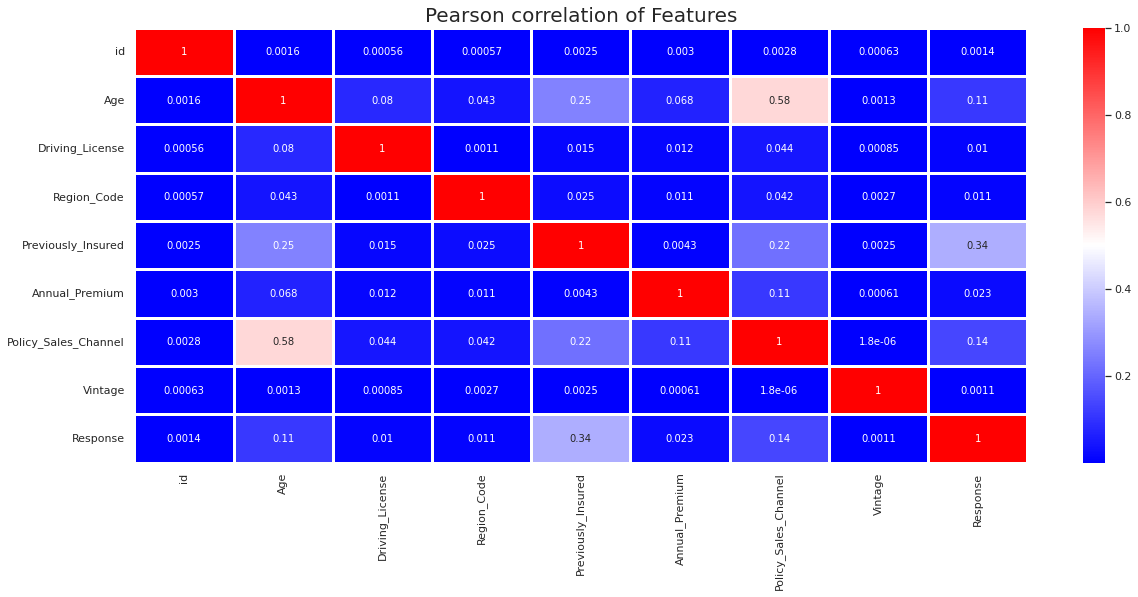

In [29]:
# Correlation Heatmap visualization code
# Checking correlation of all the columns using heatmap
plt.figure(figsize = (20, 8))
correlation = data.corr()
sns.heatmap(abs(correlation),annot=True,linewidth=3,cmap='bwr')
plt.title('Pearson correlation of Features',fontsize=20)
plt.show()

**1. Why did you pick the specific chart?**



*  A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. 


*   A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables.





  **2. What is/are the insight(s) found from the chart?**






*   Target variable is not much affected by Vintage variable. we can drop least correlated variable.

*   Rest all correlation can be depicted from the above chart.



# **5. Hypothesis Testing**

###**Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.**



*   If customer buying Health insurance then on an average customer taking Annual premium of rs. 30565

*   If customer buying Health insurance then atleast 154 days, customer has been assosiated with the company.

*  At most 60 years of customers are more likely to buy the insurance.






In [30]:
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
    


In [31]:

# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()
     

In [32]:
#Taking sample from dataset
sample = data.sample(frac=0.25)

##**Hypothetical Statement - 1**

If customer buying Health insurance then on an average customer taking Annual premium of rs. 30565.

###**1. State Your research hypothesis as a null hypothesis and alternate hypothesis.**

Null Hypothesis: H0 = 30565

Alternate Hypothesis :H1 = 30565

Test Type: Two Tailed Test

###**2. Perform an appropriate statistical test.**

In [33]:
# Perform Statistical Test to obtain P-Value
# Getting the required parameter values for hypothesis testing
hypothesis_number = 30565
sample_mean_1 = sample["Annual_Premium"].mean()
size = len(sample)
std_1=(variance(sample["Annual_Premium"]))**0.5


In [34]:
# Perform Statistical Test to obtain P-Value
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean_1,size,std_1)
# Getting P - Value
p = p_value(z=z,tailed='d',t="true",hypothesis_number=hypothesis_number,df=sample,col="Annual_Premium")
# Getting Conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.08769216371557427.


**Which statistical test have you done to obtain P-Value?**

I have used T-Test as the statistical testing to obtain P-Value and found the result that Failed to reject Null hypothesis and Customers buying health insurance have the average of Annual Premium is 30565.

**Why did you choose the specific statistical test?**

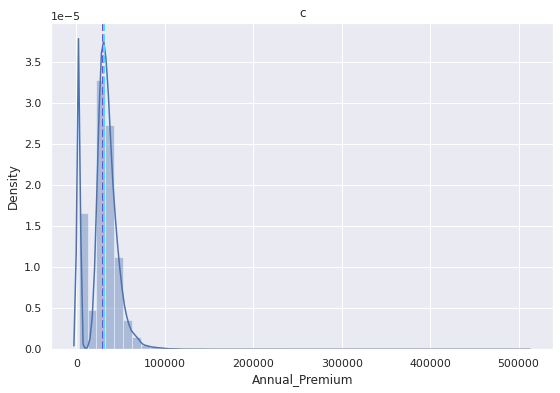

In [35]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (sample["Annual_Premium"])
sns.distplot(sample["Annual_Premium"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title('c')
plt.show()

In [36]:
mean_median_difference=sample["Annual_Premium"].median()- sample["Annual_Premium"].mean()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- 972.1326972931565




*   From the above we can see the differemnce between mean and median is larger and the distribution is postively skewed. For a skewed data Z-Test can't be performed.

*   Non-parametric tests are most useful for small studies. Using non-parametric tests in large studies may provide answers to the wrong question, thus confusing readers. For studies with a large sample size, t-tests and their corresponding confidence intervals can and should be used even for heavily skewed data.


*   So, for a skewed data we can use T-test for better result. Thus, I used t - test.






## **Hypothetical Statement - 2**

If customer buying Health insurance then atleast 154 days, customer has been assosiated with the company.

###**1. State Your research hypothesis as a null hypothesis and alternate hypothesis.**

Null Hypothesis: H0 >= 154

Alternate Hypothesis : H1 < 154

Test Type: Left Tailed Test

###**2. Perform an appropriate statistical test.**

In [37]:
# Perform Statistical Test to obtain P-Value
# Getting the required parameter values for hypothesis testing
hypothesis_number = 154
sample_mean_2 = sample["Vintage"].mean()
size = len(sample)
std_2=(variance(sample["Vintage"]))**0.5

In [38]:

# Perform Statistical Test to obtain P-Value
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean_2,size,std_2)
# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=sample,col="Vintage")
# Getting Conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.9533635311227544.


####**Which statistical test have you done to obtain P-Value?**

I have used Z-Test as the statistical testing to obtain P-Value and found the result that failed to reject Null hypothesis and Customers are assosiated with the company atleast 154 days after buying health insurance.

####**Why did you choose the specific statistical test?**

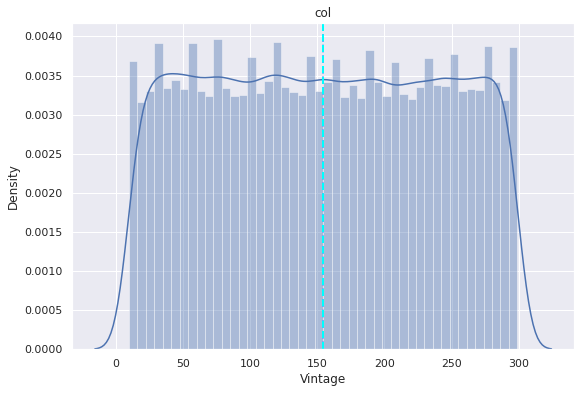

In [39]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (sample["Vintage"])
sns.distplot(sample["Vintage"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title('col')
plt.show()

In [40]:
mean_median_difference=sample["Vintage"].median()- sample["Vintage"].mean()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- -0.45528301688759143


As shown in the figure the mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

## **Hypothetical Statement - 3**

At most 60 years of customers are more likely to buy the insurance.

####**1. State Your research hypothesis as a null hypothesis and alternate hypothesis.**

Null Hypothesis: H0 <= 60

Alternate Hypothesis : H1 > 60

Test Type: Right Tailed Test

####**2. Perform an appropriate statistical test.**

In [41]:

# Perform Statistical Test to obtain P-Value
# Getting the required parameter values for hypothesis testing
hypothesis_number = 60
sample_mean_3 = sample["Age"].mean()
size = len(sample)
std_3=(variance(sample["Age"]))**0.5

In [42]:
# Perform Statistical Test to obtain P-Value
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean_3,size,std_3)
# Getting P - Value
p = p_value(z=z,tailed='r',t="false",hypothesis_number=hypothesis_number,df=sample,col="Age")
# Getting Conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 1.0.


**Which statistical test have you done to obtain P-Value?**

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis can't be rejected and Customers at most age 60 are buying health insurance.

**Why did you choose the specific statistical test?**

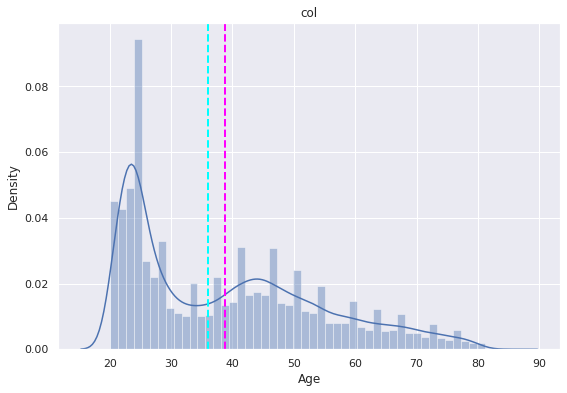

In [43]:

# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (sample["Age"])
sns.distplot(sample["Age"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title('col')
plt.show()

In [44]:
mean_median_difference=sample["Age"].median()- sample["Age"].mean()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- -2.8084847339861696


As shown in the figure the mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

## **6. Feature Engineering & Data Pre-processing**

In [45]:
# Creating a copy of the dataset for further feature engineering
data_1 = data.copy()

### **1. Handling Missing Values**

In [46]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(data_1.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


 **What all missing value imputation techniques have you used and why did you use those techniques?**

There are no missing values to handle in the given dataset.

###**2. Handling Outliers**

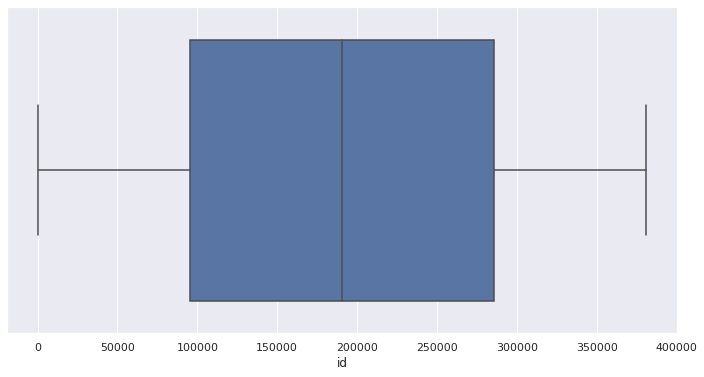

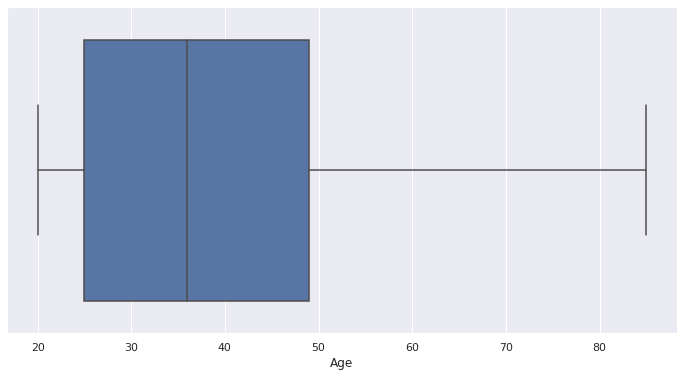

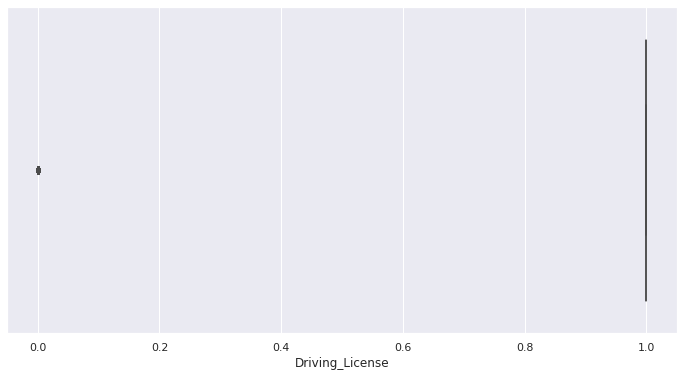

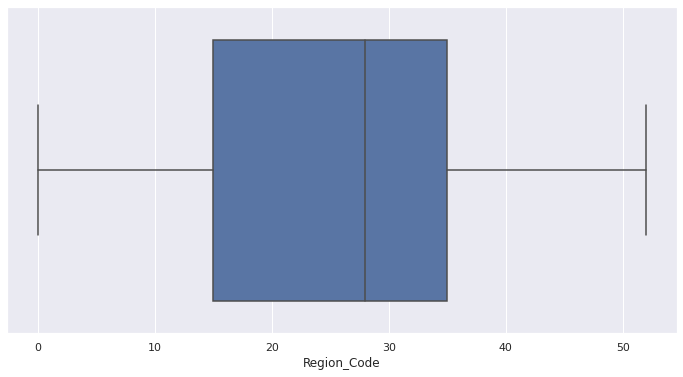

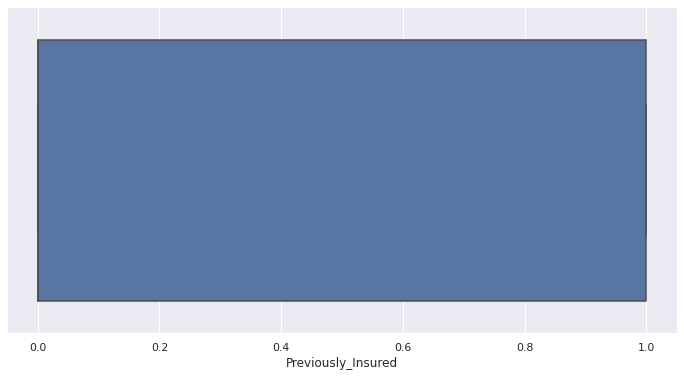

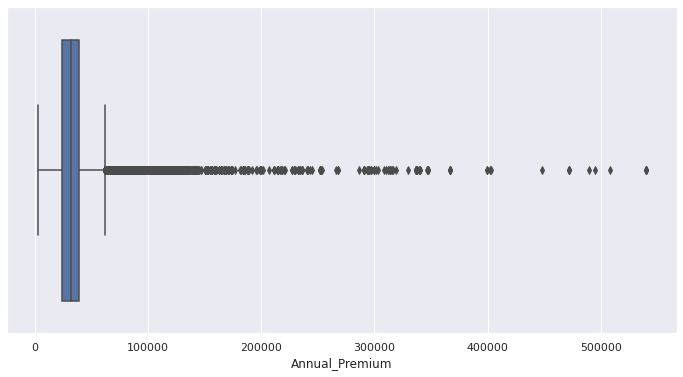

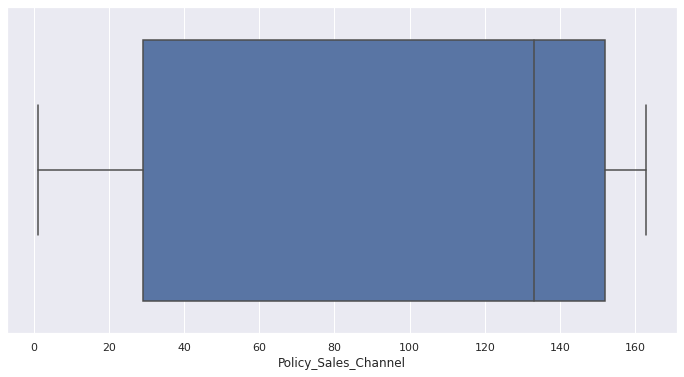

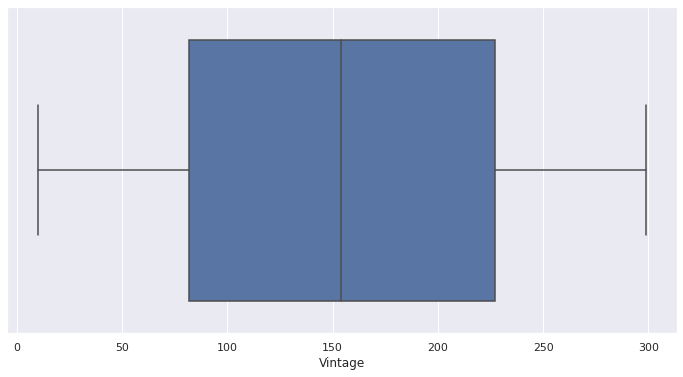

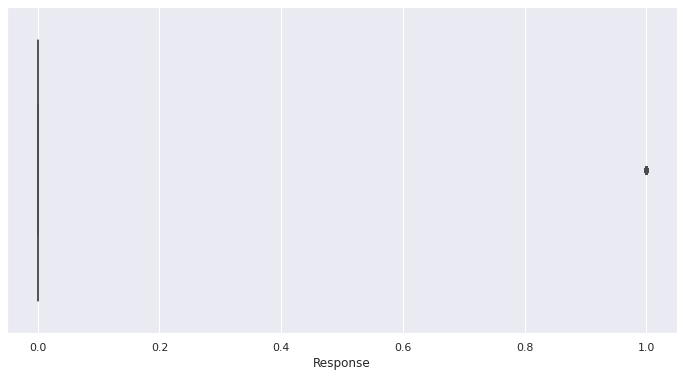

In [47]:
# Handling Outliers & Outlier treatments
# Checking Outliers with boxplot
for column_name in num_cols:
  plt.figure(figsize=(12,6))
  sns.boxplot(data_1[column_name])
  plt.show()

In [48]:
#Function for checking outliers
def check_outlier(start,end,step,column_name):
  for i in range(start,end,step):
    n = column_name.values
    n = np.sort(n)
    print('{} percentile value is {}'.format(i,int(column_name.quantile(i/100))))
  print('{} percentile value is {}'.format(end,int(column_name.quantile(end/100))))

In [49]:
#Checking outliers of Annual_Premium
check_outlier(0,100,10,data_1['Annual_Premium'])

0 percentile value is 2630
10 percentile value is 2630
20 percentile value is 21583
30 percentile value is 26238
40 percentile value is 29082
50 percentile value is 31669
60 percentile value is 34406
70 percentile value is 37548
80 percentile value is 41711
90 percentile value is 48431
100 percentile value is 540165


In [50]:
#Checking outliers of Annual_Premium
check_outlier(10,20,1,data_1['Annual_Premium'])

10 percentile value is 2630
11 percentile value is 2630
12 percentile value is 2630
13 percentile value is 2630
14 percentile value is 2630
15 percentile value is 2630
16 percentile value is 2630
17 percentile value is 2630
18 percentile value is 19050
19 percentile value is 20612
20 percentile value is 21583


In [51]:
#Checking outliers of Annual_Premium
check_outlier(90,100,1,data_1['Annual_Premium'])

90 percentile value is 48431
91 percentile value is 49412
92 percentile value is 50505
93 percentile value is 51774
94 percentile value is 53287
95 percentile value is 55176
96 percentile value is 57564
97 percentile value is 60680
98 percentile value is 65380
99 percentile value is 72963
100 percentile value is 540165


In [52]:
# Removing outliers of column Annual_Premium
data_1 = data_1.drop(data_1[data['Annual_Premium'] < 19050].index)
data_1 = data_1.drop(data_1[data['Annual_Premium'] > 60680].index)

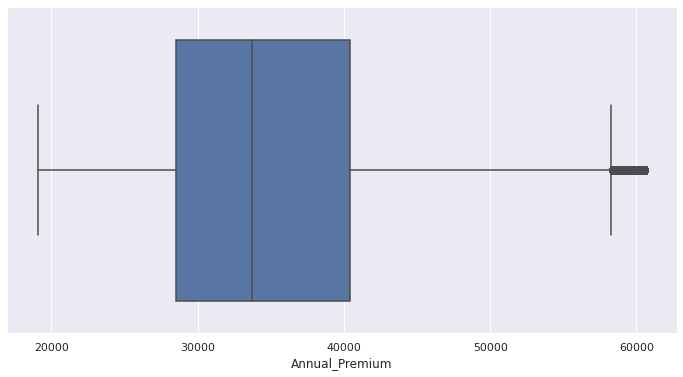

In [53]:
# Again checking outliers are removed or not
plt.figure(figsize=(12,6))
sns.boxplot(data_1['Annual_Premium'])
plt.show()

**What all outlier treatment techniques have you used and why did you use those techniques?**

I used 2 outlier treatment techniques to check outliers boxplot and quantile because in these techniques i can easily find the outliers after which value it started.

### **3. Categorical Encoding**

In [54]:
# Encode your categorical columns
# Label Encoder on Vehicle damage
le = LabelEncoder()
data_1['Vehicle_Damage'] = le.fit_transform(data_1['Vehicle_Damage'])

In [55]:
# Changing categorical value to numerical values
data_1 = pd.get_dummies(data_1, columns = ['Gender','Vehicle_Age'])

In [56]:
data_1.head()
     

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,1,0,0,1
1,2,76,1,3.0,0,0,33536.0,26.0,183,0,0,1,1,0,0
2,3,47,1,28.0,0,1,38294.0,26.0,27,1,0,1,0,0,1
3,4,21,1,11.0,1,0,28619.0,152.0,203,0,0,1,0,1,0
4,5,29,1,41.0,1,0,27496.0,152.0,39,0,1,0,0,1,0


### **What all categorical encoding techniques have you used & why did you use those techniques?**

I have used Label Encoding technique for Vehicle_Damage column and One Hot Encoding for Gender, Vehicle_Age Column. I have used label encoding, because there are only 2 unique values (Yes,No) in column which needed to be encoded.

### **4. Feature Manipulation & Selection**

####**1. Feature Manipulation** 

In [57]:
# Manipulate Features to minimize feature correlation and create new features
#Contain all independent variables
x = data_1.drop(['Response'], axis=1)

#Contain Dependent variable
y = data_1['Response'] 

####**2. Feature Selection**

In [58]:
#Implementation Variance Threshold
variance_threshold = VarianceThreshold(threshold=0)
variance_threshold.fit(data_1)
variance_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [59]:
#Implementation ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)
# Training the model
extra_tree_forest.fit(x, y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

In [60]:
# Normalizing the individual importances
feature_importance_normalized = np.std( [ tree.feature_importances_ for tree in extra_tree_forest.estimators_ ] , axis = 0)
     

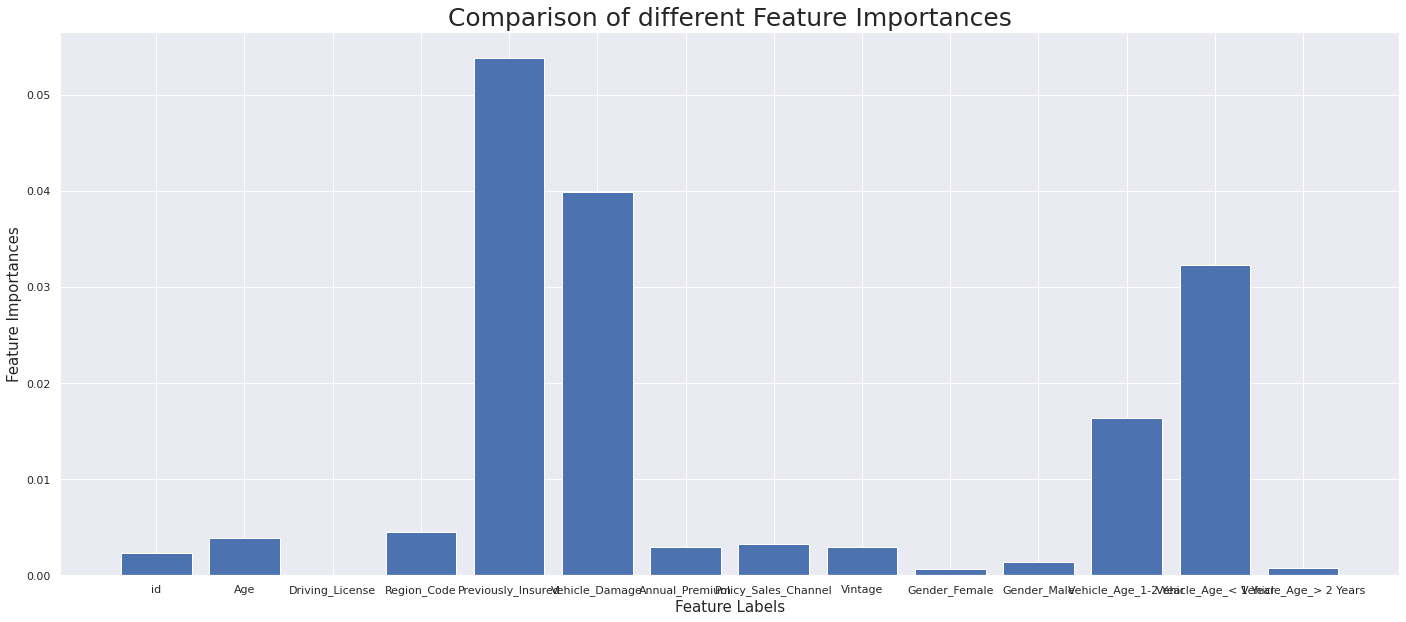

In [61]:
# Plotting a Bar Graph to compare the models
plt.figure(figsize = (24,10))
plt.bar(x.columns, feature_importance_normalized)
plt.xlabel('Feature Labels' , fontsize = 15)
plt.ylabel('Feature Importances' , fontsize = 15)
plt.title('Comparison of different Feature Importances' , fontsize = 25)
plt.show()

In [62]:
feat_importances_Series = pd.Series( feature_importance_normalized , index=x.columns)
print("Feature Name\t\t Importance")
print("-"*37 , end='\n')
feat_importances_Series.sort_values()

Feature Name		 Importance
-------------------------------------


Driving_License          0.000046
Gender_Female            0.000662
Vehicle_Age_> 2 Years    0.000782
Gender_Male              0.001426
id                       0.002289
Annual_Premium           0.002937
Vintage                  0.002996
Policy_Sales_Channel     0.003246
Age                      0.003862
Region_Code              0.004536
Vehicle_Age_1-2 Year     0.016378
Vehicle_Age_< 1 Year     0.032310
Vehicle_Damage           0.039867
Previously_Insured       0.053862
dtype: float64

In [63]:
# Dropping less important features
data_1.drop(columns=['Driving_License','Gender_Female','Gender_Male','id'],inplace=True)

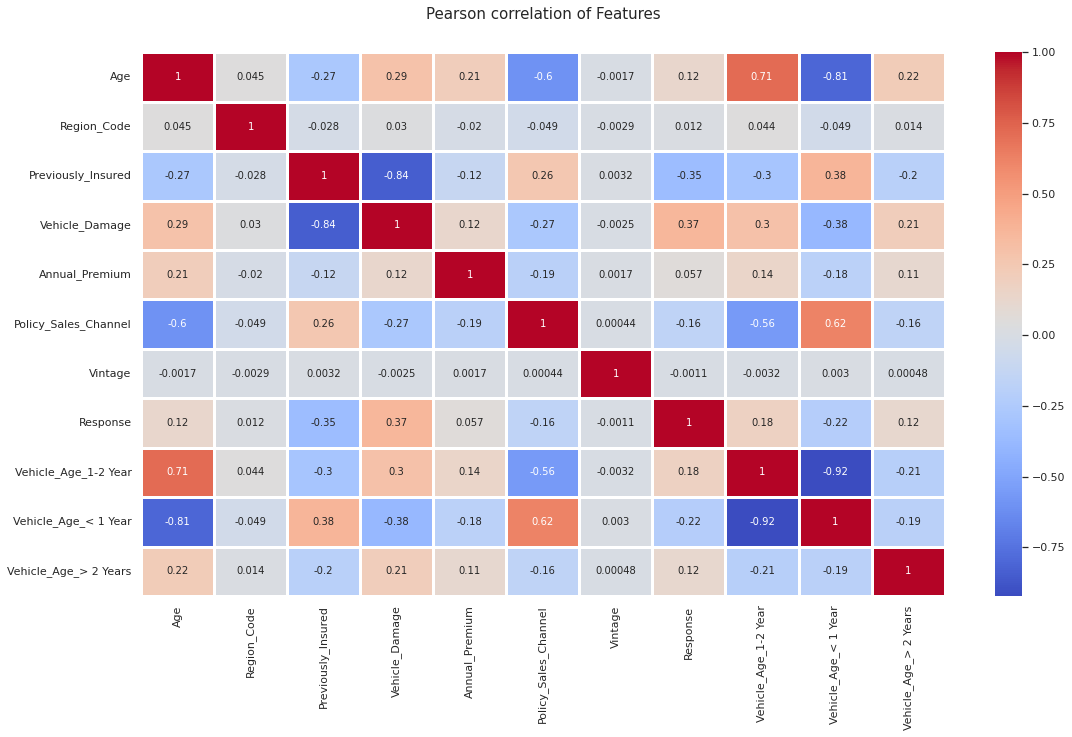

In [64]:
# Select your features wisely to avoid overfitting
#Checking correlation of all the columns using heatmap
plt.figure(figsize = (18,10))
correlation = data_1.corr()
sns.heatmap(correlation, annot= True,linewidths=3,cmap='coolwarm')
plt.title("Pearson correlation of Features", y=1.05, size=15)
plt.show()

In [65]:
# Well on the above heat chart we can find that the columns Previously_insured and vehicle_damaged is Highly Correlated here.
#Creating function to see the Highly correlated variable , using our provided threshold.
def correlation(df, threshold):
    col_corr = set()  
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr
# Mostly 0.85 is considered for Highly correlated , so its not above 0.85 .
corr_features = correlation(data, 0.75)
len(set(corr_features))

print(corr_features)

set()


**What all feature selection methods have you used and why?**

I used three method for feature selection Variance threshold, Extra Tree classification and correlation map. I used Variance threshold to check the which columns has constant values, Tree classification for checking whuch columns are less important for the dependent variable and correlation map for the removing of high correlation variables.

####**Which all features you found important and why?**



*   Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel','Vehicle_Age_1-2 Year','Vehicle_Age_< 1 Year','Vehicle_Age_> 2 Year'


*   I found these features are imprtant from the above obervation.



### **5. Data Splitting**

In [66]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Contain all independent variables
X = data_1.drop(['Response'], axis=1)

#Contain Dependent variable
Y = data_1['Response'] 

In [67]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [68]:
print('Train Data Shape')
print(X_train.shape)
print(y_train.shape)
print('\n')
print('Test Data Shape')
print(X_test.shape)
print(y_test.shape)

Train Data Shape
(210753, 10)
(210753,)


Test Data Shape
(90324, 10)
(90324,)


**What data splitting ratio have you used and why?**

I used 80% data for training and 20% of data for test because it gives the best results.

### **6. Data Scaling**

In [69]:
# Scaling your data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Which method have you used to scale you data and why?**



*   We used Standardization (StandardScaler) method for Data Scaling.

*  Standardization Here all the features will be transformed in such a way that it will have the properties of a standard normal distribution with mean (μ) = 0 and standard deviation(σ) = 1.



### **7. Handling Imbalanced Dataset**

0    264879
1     36198
Name: Response, dtype: int64
 


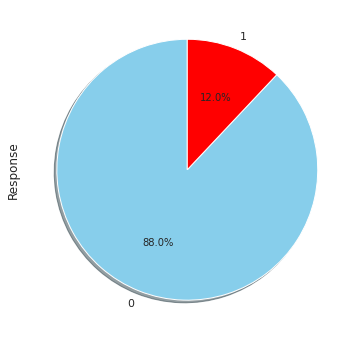

In [70]:
# Dependant Column Value Counts
print(data_1.Response.value_counts())
print(" ")
# Dependant Variable Column Visualization
data_1['Response'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )
plt.show()

**Do you think the dataset is imbalanced? Explain Why.**

One of the most significant challenges when dealing with unbalanced datasets is the metrics used to evaluate their model. Using simpler metrics, such as accuracy score, can be misleading. In a dataset with highly unbalanced classes, the classifier will always "predict" the most common class without performing any feature analysis, and while it will have a high accuracy rate, it will often be incorrect.

In [71]:
# using Smote Oversampling
sm = SMOTE(random_state=5)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [72]:
# Checking Shape after resampling
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (370894, 10)
Number transactions y_train dataset:  (370894,)
Number transactions X_test dataset:  (90324, 10)
Number transactions y_test dataset:  (90324,)


**What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)**

The dataset has now been balanced using the oversampling technique, and it is ready for training the model.we have used smote and oversampling technique. oversampling performing better.

#**7. ML Model Implementation**



*  Problem can be identified as Binary Classification (wheather customer opts for vehicle insurance or not)
*  Required model selections according to Dataset





*   Logistic Regression
*   Decision Tree

*   Gaussian Naive Bayes
*   AdaBoost Classifier

*   XGBClassifier
*   Lightgbm Classifier


*  Bagging Classifier









###**Functions used in ML implementation**

In [73]:
# Function for ploting confusion matrix 
def plot_confusion_matrix(X_test, y_test, y_pred_test):
    
    label = ['1', '0']
    cm = confusion_matrix(y_test, y_pred_test)
    group_names = ['True positive','False Positive','False Negative','True Negative']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax= plt.subplot()
    sns.heatmap(cm, annot=labels, fmt='',cmap='Blues')
    ax.set_title('Confusion Matrix', fontdict={'fontsize': 16, 'fontweight':'bold'})
    ax.xaxis.set_ticklabels(label)
    ax.yaxis.set_ticklabels(label)

    plt.show()

In [74]:
# Function for ploting roc curve
def plot_roc_curve(model, X_test, y_test, y_pred):

    pred_proba = model.predict_proba(X_test)
    # roc curve for models
    fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)     
    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    # plot roc curves
    plt.plot(fpr, tpr,linestyle='--',color='red', label = type(model).__name__)
    plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')
    # title
    plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
    # x label
    plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
    # y label
    plt.ylabel('True Positive rate', fontdict={'fontsize': 12})
    plt.legend(loc='best')

    plt.show()
     

In [75]:

#Function Evaluation matrices before tuning
models = []
Train_Accuracy=[]
Train_Precision=[]
Train_Recall=[]
Train_F1_Score=[]
Train_ROC_AUC_Score=[]
Train_Log_Loss=[]
def Performance(model,y_tset, y_pred):
  models.append(type(model).__name__)
  acs = accuracy_score(y_tset, y_pred)
  Train_Accuracy.append(accuracy_score(y_test,y_pred))
  ps = precision_score(y_tset, y_pred)
  Train_Precision.append(precision_score(y_test,y_pred))
  rs = recall_score(y_tset, y_pred)
  Train_Recall.append(recall_score(y_test,y_pred))
  f1s = f1_score(y_tset, y_pred)
  Train_F1_Score.append(f1_score(y_test,y_pred))
  ras = roc_auc_score(y_tset, y_pred)
  Train_ROC_AUC_Score.append(roc_auc_score(y_test, y_pred))
  ll = log_loss(y_test, y_pred)
  Train_Log_Loss.append(log_loss(y_test, y_pred))
  print('*'*115)
  print('Accuracy Score','    Train_Precision Score','    Train_Recall Score','      F1 Score','           ROC AUC Score','     Log Loss')
  print(acs, ps, rs,f1s, ras,ll)
     

In [76]:
# Function for Evaluation Metrics after tuning
Accuracy=[]
Precision=[]
Recall=[]
F1_Score=[]
ROC_AUC_Score=[]
Log_Loss=[]
def evaluation_metrics(model,y_test,y_pred):
    metrics_dict = {}
    metrics_dict['Accuracy_Score'] = [accuracy_score(y_test,y_pred)]  #Accuracy Score
    Accuracy.append(accuracy_score(y_test,y_pred))
    metrics_dict['Precision'] = [precision_score(y_test,y_pred)] #Precision
    Precision.append(precision_score(y_test,y_pred))
    metrics_dict['Recall'] = [recall_score(y_test,y_pred)] #Recall
    Recall.append(recall_score(y_test,y_pred))
    metrics_dict['F1_Score'] = [f1_score(y_test,y_pred)] #F1 Score
    F1_Score.append(f1_score(y_test,y_pred))
    metrics_dict['ROC_AUC_Score'] = [roc_auc_score(y_test, y_pred)] #ROC AUC Score
    ROC_AUC_Score.append(roc_auc_score(y_test, y_pred))
    metrics_dict['Log_Loss'] = [log_loss(y_test, y_pred)] #Log Loss
    Log_Loss.append(log_loss(y_test, y_pred))
    metrics_df = pd.DataFrame(metrics_dict)
    print('*'*75)
    print(metrics_df)

In [77]:
#Function for hyperparameter tunning
def hyperparameter_tuning(x_train, y_train, model, parameters, tuning_model):

    if tuning_model == 'Halving_Randomized_Search_CV':
        tuned_model = HalvingRandomSearchCV(model, param_distributions = parameters, scoring = "accuracy", n_jobs=-1, factor=3, cv = 5 )
    
    elif tuning_model == 'Randomized_Search_CV':
        tuned_model = RandomizedSearchCV(model, param_distributions = parameters, scoring = 'accuracy', cv = 3, n_iter = 50, n_jobs=-1)

    else:
        tuned_model = GridSearchCV(model, param_grid = parameters, scoring = 'accuracy', n_jobs=-1, cv = 3)

    print('########'*8+'\n     <<<< '+f'Tuning Model: {tuning_model}'+' >>>>\n'+'********'*8)
    print('-----'*10+f'\n{type(model).__name__}\n'+'-----'*10)
    
    start_time = time.time() 
    
    tuned_model.fit(x_train, y_train)
    
    stop_time = time.time()

    print('*****'*10+f'\nBest Score for {type(model).__name__} : {tuned_model.best_score_}','\n---')
    print(f'Best Parameters for {type(model).__name__} : {tuned_model.best_params_}\n'+'-----'*10)

    print('Elapsed Time:',time.strftime("%H:%M:%S", time.gmtime(stop_time - start_time)))
    print('======'*5)

    return tuned_model

###**ML Model - 1 : Implementing Logistic Regression**

In [78]:
# ML Model - 1 Implementation
model1 = LogisticRegression()

# Fit the Algorithm
model1 = model1.fit(X_train,y_train)

# Predict on the model
train_class_preds = model1.predict(X_train)
test_class_preds = model1.predict(X_test)

####**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [79]:
# Evaluation Metrics before tuning
print('-----'*23+f'\nEvaluation of {type(model1).__name__} before tuning:\n'+'-----'*23)
Performance(model1,y_test, test_class_preds)

-------------------------------------------------------------------------------------------------------------------
Evaluation of LogisticRegression before tuning:
-------------------------------------------------------------------------------------------------------------------
*******************************************************************************************************************
Accuracy Score     Train_Precision Score     Train_Recall Score       F1 Score            ROC AUC Score      Log Loss
0.6532483060980471 0.2551656359365262 0.9773228057289753 0.40467591712602163 0.7930664285468323 11.97665429542039


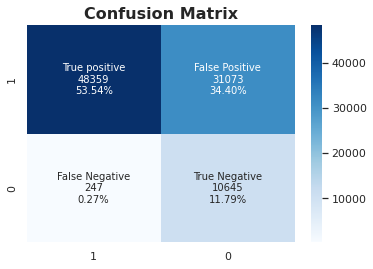

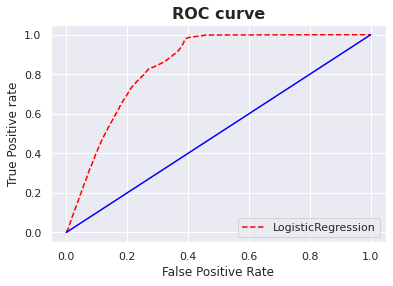

In [80]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, test_class_preds)
# ROC Curve
plot_roc_curve(model1, X_test, y_test, test_class_preds)

####**2. Cross- Validation & Hyperparameter Tuning**

In [81]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters_logistic = {'solver' : ['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
                        'penalty' : ['l2'],
                        'C' : [100, 10, 1.0, 0.1, 0.01, 0.001], 
                       'random_state':[2]}
# Fit the Algorithm
tuned_model = hyperparameter_tuning(X_train, y_train, model1, parameters_logistic, 'Halving_Randomized_Search_CV')

# Predict on the model
tuned_pred = tuned_model.predict(X_test)

# Evaluation Metrics after tuning
print(f'\nEvaluation of {type(model1).__name__} after tuning:\n'+'-----'*10)
evaluation_metrics(model1,y_test,tuned_pred)

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
LogisticRegression
--------------------------------------------------
**************************************************
Best Score for LogisticRegression : 0.7903772931810314 
---
Best Parameters for LogisticRegression : {'solver': 'liblinear', 'random_state': 2, 'penalty': 'l2', 'C': 100}
--------------------------------------------------
Elapsed Time: 00:00:06

Evaluation of LogisticRegression after tuning:
--------------------------------------------------
***************************************************************************
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score   Log_Loss
0        0.653248   0.255166  0.977323  0.404676       0.793066  11.976654


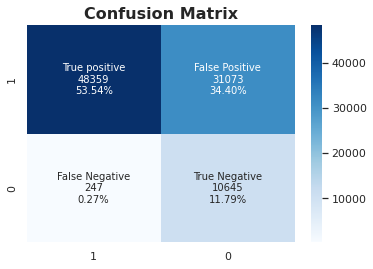

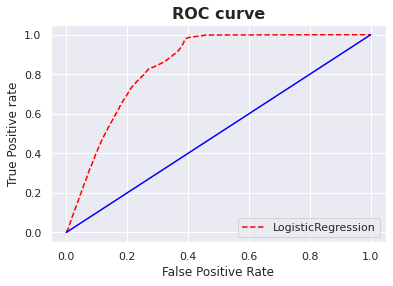

In [82]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, tuned_pred)
# ROC Curve
plot_roc_curve(model1, X_test, y_test, tuned_pred)

**Which hyperparameter optimization technique have you used and why?**

I have used 'Halving_Randomized_Search_CV' hyperparameter optimization technique because it took very less time in comparison to others techniques.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

I haven't seen improvement after tunning.

###**ML Model - 2 : Implementing DecisionTreeClassifier**

In [83]:
# ML Model - 2 Implementation (DecisionTreeClassifier)
model2 = DecisionTreeClassifier()

# Fit the Algorithm
model2 = model2.fit(X_train,y_train)

# Predict on the model
train_class_preds = model2.predict(X_train)
test_class_preds = model2.predict(X_test)

####**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [84]:

# Evaluation Metrics before tuning
print('-----'*23+f'\nEvaluation of {type(model2).__name__} before tuning:\n'+'-----'*23)
Performance(model2,y_test, test_class_preds)

-------------------------------------------------------------------------------------------------------------------
Evaluation of DecisionTreeClassifier before tuning:
-------------------------------------------------------------------------------------------------------------------
*******************************************************************************************************************
Accuracy Score     Train_Precision Score     Train_Recall Score       F1 Score            ROC AUC Score      Log Loss
0.8255391700987555 0.29444068942210205 0.3199596033786265 0.3066701865540302 0.607412826163077 6.0257375212473105


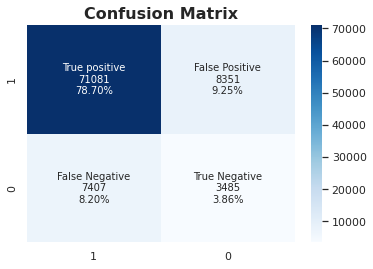

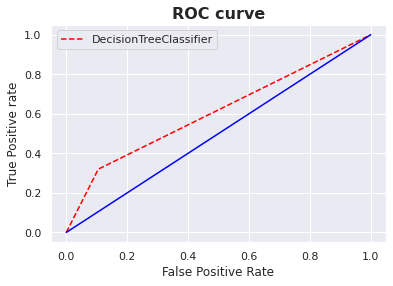

In [85]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, test_class_preds)
# ROC Curve
plot_roc_curve(model2, X_test, y_test, test_class_preds)

####**2. Cross- Validation & Hyperparameter Tuning**

In [86]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters_decision_tree = {"splitter":["best","random"],
           "max_depth" : [None,5,7,9],
           "min_samples_leaf":[1,2,3,4,5],
           "min_weight_fraction_leaf":[0.0, 0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,30,40,50,60], 
           'random_state':[23]}
                       
# Fit the Algorithm
tuned_model = hyperparameter_tuning(X_train, y_train, model2, parameters_decision_tree, 'Halving_Randomized_Search_CV')

# Predict on the model
tuned_pred = tuned_model.predict(X_test)

# Evaluation Metrics after tuning
print(f'\nEvaluation of {type(model2).__name__} after tuning:\n'+'-----'*10)
evaluation_metrics(model2,y_test,tuned_pred)

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
DecisionTreeClassifier
--------------------------------------------------
**************************************************
Best Score for DecisionTreeClassifier : 0.7945771256396275 
---
Best Parameters for DecisionTreeClassifier : {'splitter': 'random', 'random_state': 23, 'min_weight_fraction_leaf': 0.0, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': 'auto', 'max_depth': 7}
--------------------------------------------------
Elapsed Time: 00:00:55

Evaluation of DecisionTreeClassifier after tuning:
--------------------------------------------------
***************************************************************************
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score   Log_Loss
0        0.644657     0.2504  0.9764

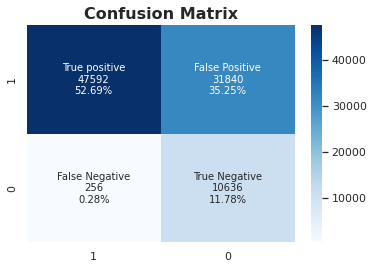

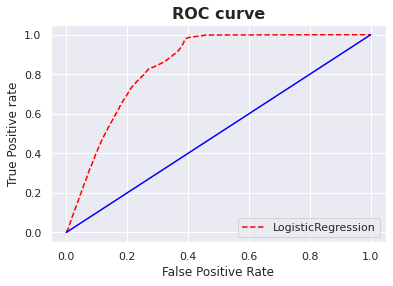

In [87]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, tuned_pred)
# ROC Curve
plot_roc_curve(model1, X_test, y_test, tuned_pred)

**Which hyperparameter optimization technique have you used and why?**

I have used 'Halving_Randomized_Search_CV' hyperparameter optimization technique because it took very less time in comparison to others techniques.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

After the hyperparameter tuning i have seen the model is under performing, its performing well before tuning . so, no need of tuning in this model.



###**ML Model - 3 : Implementing GaussianNaiveBayes**

In [88]:

# ML Model - 3 Implementation (GaussianNaiveBayes)
model4 = GaussianNB()

# Fit the Algorithm
model4 = model4.fit(X_train,y_train)

# Predict on the model
train_class_preds = model4.predict(X_train)
test_class_preds = model4.predict(X_test)

####**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [89]:
# Evaluation Metrics before tuning
print('-----'*23+f'\nEvaluation of {type(model4).__name__} before tuning:\n'+'-----'*23)
Performance(model4,y_test, test_class_preds)

-------------------------------------------------------------------------------------------------------------------
Evaluation of GaussianNB before tuning:
-------------------------------------------------------------------------------------------------------------------
*******************************************************************************************************************
Accuracy Score     Train_Precision Score     Train_Recall Score       F1 Score            ROC AUC Score      Log Loss
0.683705327487711 0.27043453416794366 0.9559309585016526 0.4215982021743972 0.8011538668024428 10.924679627988356


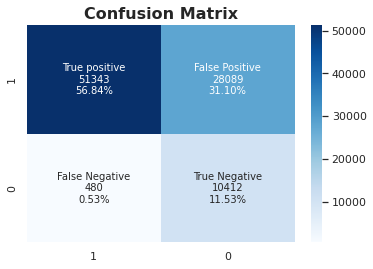

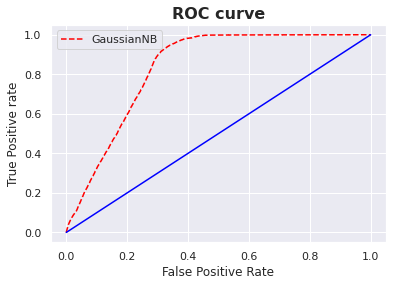

In [90]:

# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, test_class_preds)
# ROC Curve
plot_roc_curve(model4, X_test, y_test, test_class_preds)

####**2. Cross- Validation & Hyperparameter Tuning**

In [91]:

# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
                    
# Fit the Algorithm
tuned_model = hyperparameter_tuning(X_train, y_train, model4, parameters_NB, 'Halving_Randomized_Search_CV')

# Predict on the model
tuned_pred = tuned_model.predict(X_test)

# Evaluation Metrics after tuning
print(f'\nEvaluation of {type(model4).__name__} after tuning:\n'+'-----'*10)
evaluation_metrics(model4,y_test,tuned_pred)

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
GaussianNB
--------------------------------------------------
**************************************************
Best Score for GaussianNB : 0.7937067614570195 
---
Best Parameters for GaussianNB : {'var_smoothing': 0.02848035868435802}
--------------------------------------------------
Elapsed Time: 00:00:04

Evaluation of GaussianNB after tuning:
--------------------------------------------------
***************************************************************************
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.726009   0.291137  0.886614  0.438337         0.7953  9.463536


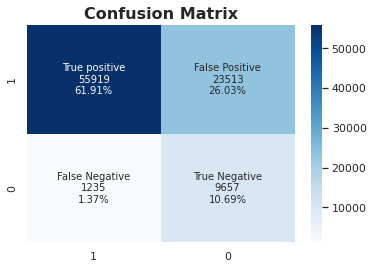

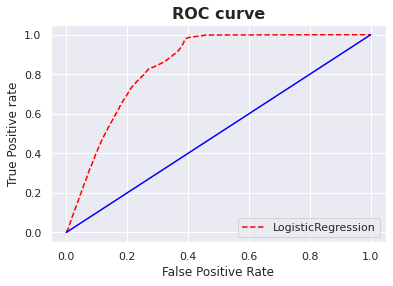

In [92]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, tuned_pred)
# ROC Curve
plot_roc_curve(model1, X_test, y_test, tuned_pred)

 **Which hyperparameter optimization technique have you used and why?**

I have used 'Halving_Randomized_Search_CV' hyperparameter optimization technique because it took very less time in comparison to others techniques.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

In this model after the hyperparameter tuning i have slightly difference that is near to negligible in this model also if we don't do tuning it will work same as before tuning.

###**ML Model - 4 : Implementing AdaBoost Classifier**

In [93]:
# ML Model - 4 Implementation (AdaBoostClassifier)
model5 = AdaBoostClassifier()

# Fit the Algorithm
model5 = model5.fit(X_train,y_train)

# Predict on the model
train_class_preds = model5.predict(X_train)
test_class_preds = model5.predict(X_test)

####**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [94]:
# Evaluation Metrics before tuning
print('-----'*23+f'\nEvaluation of {type(model5).__name__} before tuning:\n'+'-----'*23)
Performance(model5,y_test, test_class_preds)

-------------------------------------------------------------------------------------------------------------------
Evaluation of AdaBoostClassifier before tuning:
-------------------------------------------------------------------------------------------------------------------
*******************************************************************************************************************
Accuracy Score     Train_Precision Score     Train_Recall Score       F1 Score            ROC AUC Score      Log Loss
0.7216465169833045 0.2910924763971149 0.9114946749908189 0.44126405618027464 0.8035542666927102 9.614202745532877


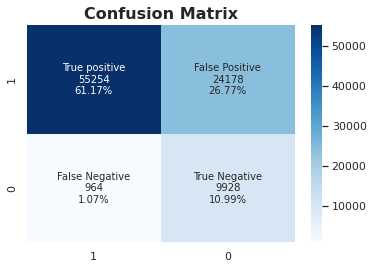

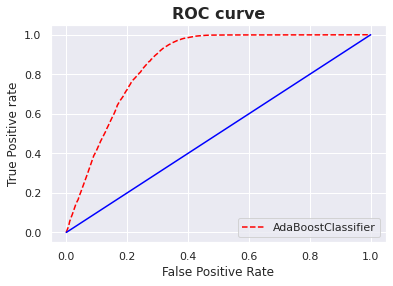

In [95]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, test_class_preds)
# ROC Curve
plot_roc_curve(model5, X_test, y_test, test_class_preds)

####**2. Cross- Validation & Hyperparameter Tuning**

In [96]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters_ada = {'n_estimators':[10, 100, 200,400],
              'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.5],
              'random_state':[2]}
# Fit the Algorithm
tuned_model = hyperparameter_tuning(X_train, y_train, model5, parameters_ada, 'Halving_Randomized_Search_CV')

# Predict on the model
tuned_pred = tuned_model.predict(X_test)

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
AdaBoostClassifier
--------------------------------------------------
**************************************************
Best Score for AdaBoostClassifier : 0.8044444444444444 
---
Best Parameters for AdaBoostClassifier : {'random_state': 2, 'n_estimators': 10, 'learning_rate': 0.1}
--------------------------------------------------
Elapsed Time: 00:00:45


In [97]:
# Evaluation Metrics after tuning
print(f'\nEvaluation of {type(model5).__name__} after tuning:\n'+'-----'*10)
evaluation_metrics(model5,y_test,tuned_pred)


Evaluation of AdaBoostClassifier after tuning:
--------------------------------------------------
***************************************************************************
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score   Log_Loss
0        0.653359   0.255602  0.980261  0.405476       0.794397  11.972831


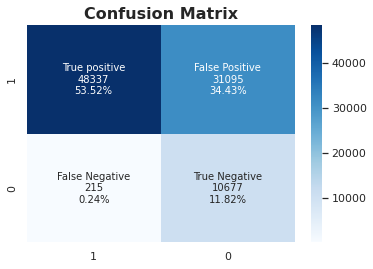

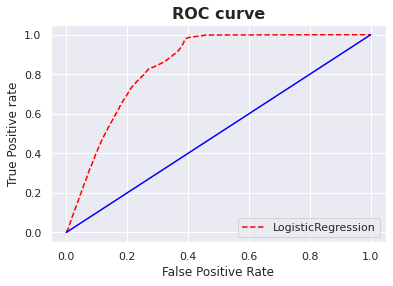

In [98]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, tuned_pred)
# ROC Curve
plot_roc_curve(model1, X_test, y_test, tuned_pred)

**Which hyperparameter optimization technique have you used and why?**



*  I have used 'Halving_Randomized_Search_CV' hyperparameter optimization technique because it took very less time in comparison to others techniques.

* Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.  


*   After the hyperparameter tuning i have seen the model is performing wrost and log loss is 13, its performing well before tuning . so, no need of tuning in this model.






###**ML Model - 5 : Implementing XGBClassifierb**

In [99]:
# ML Model - 5 Implementation (XGBClassifier)
model6 = XGBClassifier()

# Fit the Algorithm
model6 = model6.fit(X_train,y_train)

# Predict on the model
train_class_preds = model6.predict(X_train)
test_class_preds = model6.predict(X_test)

####**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [100]:
# Evaluation Metrics before tuning
print('-----'*23+f'\nEvaluation of {type(model6).__name__} before tuning:\n'+'-----'*23)
Performance(model6,y_test, test_class_preds)

-------------------------------------------------------------------------------------------------------------------
Evaluation of XGBClassifier before tuning:
-------------------------------------------------------------------------------------------------------------------
*******************************************************************************************************************
Accuracy Score     Train_Precision Score     Train_Recall Score       F1 Score            ROC AUC Score      Log Loss
0.8396439484522386 0.3624176497625249 0.4343554902680867 0.3951390628915059 0.6647870209926393 5.538575487725276


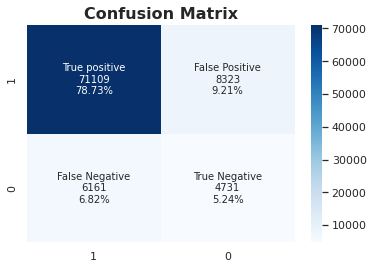

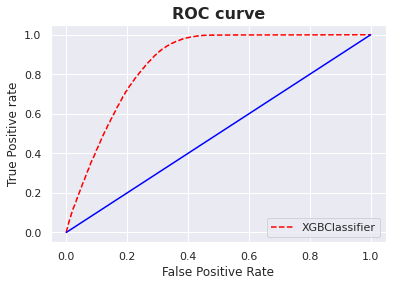

In [101]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, test_class_preds)
# ROC Curve
plot_roc_curve(model6, X_test, y_test, test_class_preds)

####**2. Cross- Validation & Hyperparameter Tuning**

In [102]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters_xgb = {'random_state':[5],'max_depth':[5]}
                    
# Fit the Algorithm
tuned_model = hyperparameter_tuning(X_train, y_train, model6, parameters_xgb, 'Halving_Randomized_Search_CV')

# Predict on the model
tuned_pred = tuned_model.predict(X_test)

# Evaluation Metrics after tuning
print(f'\nEvaluation of {type(model6).__name__} after tuning:\n'+'-----'*10)
evaluation_metrics(model6,y_test,tuned_pred)

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
XGBClassifier
--------------------------------------------------
**************************************************
Best Score for XGBClassifier : 0.4833333333333333 
---
Best Parameters for XGBClassifier : {'random_state': 5, 'max_depth': 5}
--------------------------------------------------
Elapsed Time: 00:00:41

Evaluation of XGBClassifier after tuning:
--------------------------------------------------
***************************************************************************
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.830732   0.353521  0.487147  0.409714       0.682496   5.84641


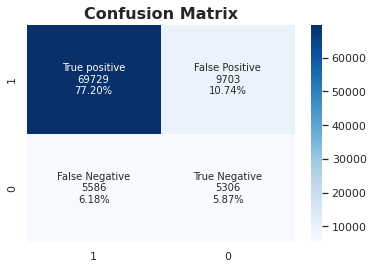

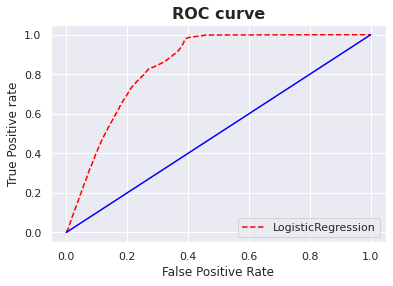

In [103]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, tuned_pred)
# ROC Curve
plot_roc_curve(model1, X_test, y_test, tuned_pred)

**Which hyperparameter optimization technique have you used and why?**

I have used 'Halving_Randomized_Search_CV' hyperparameter optimization technique because it took very less time in comparison to others techniques.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

In this Model i have seen the difference after the tuning and its improvement is

accuracy 0.76,

precision 0.31,

recall 0.81,

f1_score 0.45,

roc_auc 0.78,

log_loss 8.18.

###**ML Model - 6 : Implementing Lightgbm Classifier**

In [104]:
# ML Model - 6 Implementation (Lightgbm Classifier)
model8 = lgb.LGBMClassifier()

# Fit the Algorithm
model8 = model8.fit(X_train,y_train)

# Predict on the model
train_class_preds = model8.predict(X_train)
test_class_preds = model8.predict(X_test)

####**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [105]:
# Evaluation Metrics before tuning
print('-----'*23+f'\nEvaluation of {type(model8).__name__} before tuning:\n'+'-----'*23)
Performance(model8,y_test, test_class_preds)

-------------------------------------------------------------------------------------------------------------------
Evaluation of LGBMClassifier before tuning:
-------------------------------------------------------------------------------------------------------------------
*******************************************************************************************************************
Accuracy Score     Train_Precision Score     Train_Recall Score       F1 Score            ROC AUC Score      Log Loss
0.8193614100349852 0.344334749167719 0.550771208226221 0.4237479692025147 0.7034813337938437 6.239136989734821


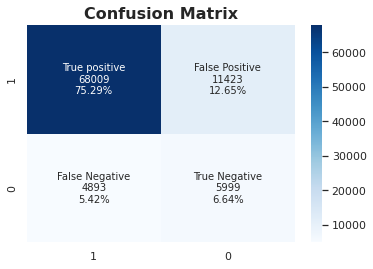

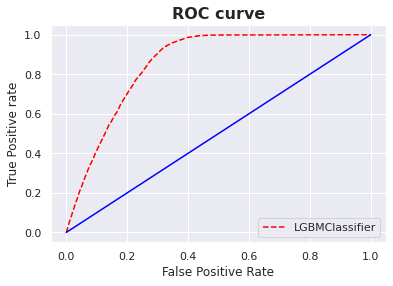

In [106]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, test_class_preds)
# ROC Curve
plot_roc_curve(model8, X_test, y_test, test_class_preds)

####**2. Cross- Validation & Hyperparameter Tuning**

In [107]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters_lightgbm = {
    'max_depths': np.linspace(1, 32, 32, endpoint=True),
    'min_data_in_leaf':[100, 200, 250, 300],
    'n_estimators':[50,100, 120,150,200],
    'learning_rate':[.001,0.01,.1]
}                    
# Fit the Algorithm
tuned_model = hyperparameter_tuning(X_train, y_train, model8, parameters_lightgbm, 'Halving_Randomized_Search_CV')

# Predict on the model
tuned_pred = tuned_model.predict(X_test)

# Evaluation Metrics after tuning
print(f'\nEvaluation of {type(model8).__name__} after tuning:\n'+'-----'*10)
evaluation_metrics(model8,y_test,tuned_pred)

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
LGBMClassifier
--------------------------------------------------
**************************************************
Best Score for LGBMClassifier : 0.8280412793201052 
---
Best Parameters for LGBMClassifier : {'n_estimators': 200, 'min_data_in_leaf': 100, 'max_depths': 14.0, 'learning_rate': 0.01}
--------------------------------------------------
Elapsed Time: 00:02:05

Evaluation of LGBMClassifier after tuning:
--------------------------------------------------
***************************************************************************
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.737556   0.297397  0.863386  0.442406       0.791844  9.064694


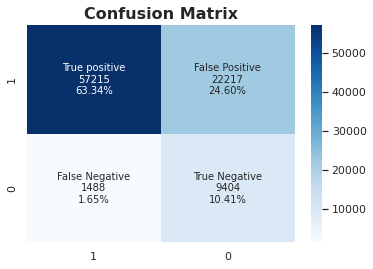

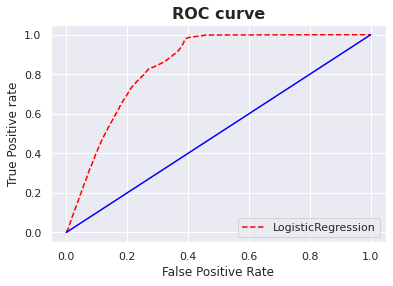

In [108]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, tuned_pred)
# ROC Curve
plot_roc_curve(model1, X_test, y_test, tuned_pred)

**Which hyperparameter optimization technique have you used and why?**

I have used 'Halving_Randomized_Search_CV' hyperparameter optimization technique because it took very less time in comparison to others techniques.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

After the hyperparameter tuning i have seen the model is under performing, its performing well before tuning . so, no need of tuning in this model.

###**ML Model - 7 : Implementing Bagging Classifier**

In [109]:
# ML Model - 7 Implementation (Bagging Classifier)
model7 = BaggingClassifier()

# Fit the Algorithm
model7 = model7.fit(X_train,y_train)

# Predict on the model
train_class_preds = model7.predict(X_train)
test_class_preds = model7.predict(X_test)

####**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [110]:
# Evaluation Metrics before tuning
print('-----'*23+f'\nEvaluation of {type(model7).__name__} before tuning:\n'+'-----'*23)
Performance(model7,y_test, test_class_preds)

-------------------------------------------------------------------------------------------------------------------
Evaluation of BaggingClassifier before tuning:
-------------------------------------------------------------------------------------------------------------------
*******************************************************************************************************************
Accuracy Score     Train_Precision Score     Train_Recall Score       F1 Score            ROC AUC Score      Log Loss
0.8516119746689695 0.32883435582822085 0.22144693352919573 0.2646623141493389 0.5797346964956888 5.125184407678321


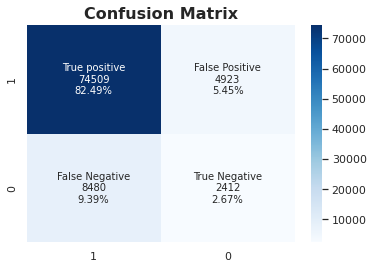

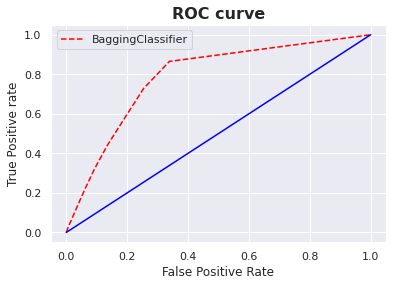

In [111]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, test_class_preds)
# ROC Curve
plot_roc_curve(model7, X_test, y_test, test_class_preds)

####**2. Cross- Validation & Hyperparameter Tuning**

In [112]:
# ML Model - 7 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters_bagging = {'n_estimators':[10, 100, 200, 400], 
                      'random_state':[26]}                    
# Fit the Algorithm
tuned_model = hyperparameter_tuning(X_train, y_train, model7, parameters_bagging, 'Halving_Randomized_Search_CV')

# Predict on the model
tuned_pred = tuned_model.predict(X_test)

# Evaluation Metrics after tuning
print(f'\nEvaluation of {type(model7).__name__} after tuning:\n'+'-----'*10)
evaluation_metrics(model7,y_test,tuned_pred)

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
BaggingClassifier
--------------------------------------------------
**************************************************
Best Score for BaggingClassifier : 0.6924242424242424 
---
Best Parameters for BaggingClassifier : {'random_state': 26, 'n_estimators': 100}
--------------------------------------------------
Elapsed Time: 00:06:35

Evaluation of BaggingClassifier after tuning:
--------------------------------------------------
***************************************************************************
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0         0.85273   0.338774  0.232464  0.275727       0.585124  5.086563


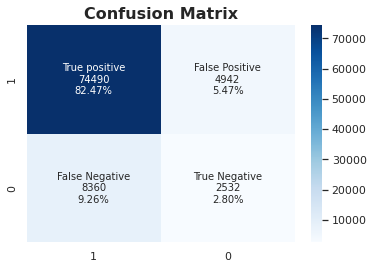

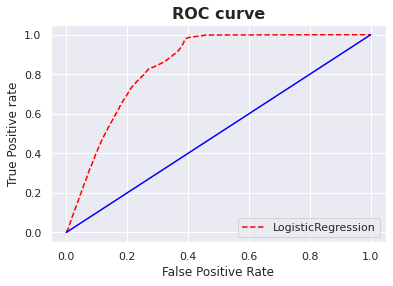

In [113]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, tuned_pred)
# ROC Curve
plot_roc_curve(model1, X_test, y_test, tuned_pred)

**Which hyperparameter optimization technique have you used and why?**

I have used 'Halving_Randomized_Search_CV' hyperparameter optimization technique because it took very less time in comparison to others techniques.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

In this model after the hyperparameter tuning i see slightly difference that is near to negligeble in this model also if we don't do tuning it will work same as before tuning.

## **Model Evalutaion**

In [114]:
with pd.option_context('display.precision', 12):
 model_comparison = pd.DataFrame({'Model Name': models,
                                                       'Before Tuning Accuracy' : Train_Accuracy,
                                                       'After Tuning Accuracy'  : Accuracy,
                                                       'Before Tuning Precision': Train_Precision,
                                                       'After Tuning Precision' : Precision,
                                                       'Before Tuning Recall'   : Train_Recall,
                                                       'After Tuning Recall'    : Recall,
                                                       'Before Tuning F1_Score' : Train_F1_Score,
                                                       'After Tuning F1_Score'  : F1_Score,
                                                       'Before Tuning ROC_AUC'  : Train_ROC_AUC_Score,
                                                       'After Tuning ROC_AUC'   : ROC_AUC_Score,
                                                       'Before Tuning Log_Loss' : Train_Log_Loss,
                                                       'After Tuning Log_Loss'  : Log_Loss})
model_comparison
     

,Model Name,Before Tuning Accuracy,After Tuning Accuracy,Before Tuning Precision,After Tuning Precision,Before Tuning Recall,After Tuning Recall,Before Tuning F1_Score,After Tuning F1_Score,Before Tuning ROC_AUC,After Tuning ROC_AUC,Before Tuning Log_Loss,After Tuning Log_Loss
0,LogisticRegression,0.653248,0.653248,0.255166,0.255166,0.977323,0.977323,0.404676,0.404676,0.793066,0.793066,11.976654,11.976654
1,DecisionTreeClassifier,0.825539,0.644657,0.294441,0.250400,0.319960,0.976497,0.306670,0.398591,0.607413,0.787825,6.025738,12.273394
2,GaussianNB,0.683705,0.726009,0.270435,0.291137,0.955931,0.886614,0.421598,0.438337,0.801154,0.795300,10.924680,9.463536
3,AdaBoostClassifier,0.721647,0.653359,0.291092,0.255602,0.911495,0.980261,0.441264,0.405476,0.803554,0.794397,9.614203,11.972831
4,XGBClassifier,0.839644,0.830732,0.362418,0.353521,0.434355,0.487147,0.395139,0.409714,0.664787,0.682496,5.538575,5.846410
5,LGBMClassifier,0.819361,0.737556,0.344335,0.297397,0.550771,0.863386,0.423748,0.442406,0.703481,0.791844,6.239137,9.064694
6,BaggingClassifier,0.851612,0.852730,0.328834,0.338774,0.221447,0.232464,0.264662,0.275727,0.579735,0.585124,5.125184,5.086563


In [115]:
# Writing the dataframe to a csv to ensure no data loss in working
model_comparison.to_csv('/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [116]:
# Reading the dataframe from the csv file again to import the scraped data from the already prepared csv file
model_comparison = pd.read_csv('/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [117]:
model_comparison.drop(['Unnamed: 0'],axis=1,inplace=True)
model_comparison

,Model Name,Before Tuning Accuracy,After Tuning Accuracy,Before Tuning Precision,After Tuning Precision,Before Tuning Recall,After Tuning Recall,Before Tuning F1_Score,After Tuning F1_Score,Before Tuning ROC_AUC,After Tuning ROC_AUC,Before Tuning Log_Loss,After Tuning Log_Loss
0,LogisticRegression,0.653248,0.653248,0.255166,0.255166,0.977323,0.977323,0.404676,0.404676,0.793066,0.793066,11.976654,11.976654
1,DecisionTreeClassifier,0.825539,0.644657,0.294441,0.250400,0.319960,0.976497,0.306670,0.398591,0.607413,0.787825,6.025738,12.273394
2,GaussianNB,0.683705,0.726009,0.270435,0.291137,0.955931,0.886614,0.421598,0.438337,0.801154,0.795300,10.924680,9.463536
3,AdaBoostClassifier,0.721647,0.653359,0.291092,0.255602,0.911495,0.980261,0.441264,0.405476,0.803554,0.794397,9.614203,11.972831
4,XGBClassifier,0.839644,0.830732,0.362418,0.353521,0.434355,0.487147,0.395139,0.409714,0.664787,0.682496,5.538575,5.846410
5,LGBMClassifier,0.819361,0.737556,0.344335,0.297397,0.550771,0.863386,0.423748,0.442406,0.703481,0.791844,6.239137,9.064694
6,BaggingClassifier,0.851612,0.852730,0.328834,0.338774,0.221447,0.232464,0.264662,0.275727,0.579735,0.585124,5.125184,5.086563


##**1. Which Evaluation metrics did you consider for a positive business impact and why?**



*   I would like to go with both Recall and Precision and which describes both is F1 Score.

*   To reduce false negative recall is important and to reduce false positives precision is important. Where both are important to be minimized, f1_score is being considered. False Positive is defined as the model predicted that the customer will buy insurance or the customer didn't buy insurance. But according to our model customer will buy insurance so, there would be quite chance of buying insurance not for immediate but after some times.



*   So, for those type of customers we can send them some beneficial modified offers to retain them. Again false negative defines as model will predict that the customer won't buy insurance but the customer really buy. That will be an issue for us.

*   So, for that case we have to minimize the false negative and false positive we must improve the score of both precision as well as recall which should direclt affect the f1_score positively. So, in our case recall will stand the higher but precision can't be neglected. so, recall should be higher and f1_score should be moderate





##**2. Which ML model did you choose from the above created models as your final prediction model and why?**



*   From all the above models that we tried to train and predict the output, we can conclude that **Bagging Classifier** is the best model for our data set. The best parameter of this model is {'n_estimators': 200}. Its Accuracy Score is 0.84, Precision is 0.32, Recall is 0.24, F1_Score is 0.27, ROC_AUC_Score is 0.58 and Log_Loss is 5.28. Its Elapsed time is 8 minute 50 seconds.

* We can see that we have other models with lower Accuracy Score than **Bagging Classifier**. as well as Bagging Classifier model, Precision and Recall values are not zero which means True Positives are cannot be zero. That means this model is able to predict correct output if any customer is ready to take vehicle insurance. And as we all know, classification accuracy alone can be misleading if you have an unequal number of observations in each class. This is exactly the case with our data set.


*   Hence, **Bagging Classifier** is the best model for our data set.






**NOTE:** You might get a slight difference in result every time you run because we are using Halving_Randomized_Search_CV to perform hyperparameter tunning which randomly selects the combination of parameters to tune the model.

##**3. Explain the model which you have used and the feature importance using any model explainability tool?**

In [118]:
def feature_plot(importances):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.2, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.2, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()

In [119]:
def show_feature_importance():
    model = BaggingClassifier(n_estimators=200, random_state=23).fit(X_train,y_train)
    
    importances = np.mean([
        tree.feature_importances_ for tree in model.estimators_
        ], axis=0)
    feature_plot(importances)

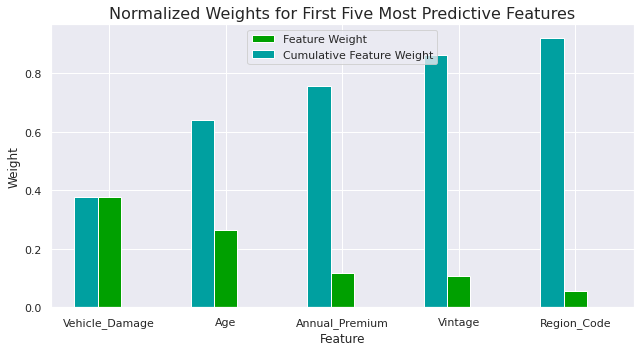

In [120]:
show_feature_importance()

## **Conclusion**

Starting from loading our dataset, we initially checked for null values and duplicates. There were no null values and duplicates so treatment of such was not required. Before data processing, we applied feature scaling techniques to normalize our data to bring all features on the same scale and make it easier to process by ML algorithms.

Through Exploratory Data Analysis,

Key points:

*   Male customers are more likely to buy the insurance.

*  Customers of age between 30 to 60 are more likely to buy insurance.


*   Customers with Vehicle_Damage are likely to buy insurance.

*   Customers with Driving License have higher chance of buying Insurance.


*  Customers of Region Code 0.28 are buying more in comparison to others.

*  Customers are buying more whose vehicle age in between 1-2 years.



*   Those customers are more likely to buy who are not buy the insurance previously.

After that we do hypothesis testing and the assumption of our hypothesis statements are right.

The variable 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel','Vehicle_Age_1-2 Year','Vehicle_Age_< 1 Year','Vehicle_Age_> 2 Year' are affecting the target variable. For Feature Selection, we used Variance threshold, Extra tree classifier and correlation heatmap . Here we observed that Previously_Insured and vehicle damage is the most important feature and has the highest impact on the dependent feature and there is no correlation between the two numeric features.

Further, we applied Machine Learning Algorithms to determine whether a customer would be interested in Vehicle Insurance. For the LogisticRegression, GaussianNB, AdaBoostClassifier,XGBClassifier algorithm, we got an accuracy score was obtained around 73%-78%. Similarly, for Decision Tree Classifier, BaggingClassifier, LightGBM accuracy score was obtained around 82%-84%. So, we selected our BaggingClassifier as the model with an accuracy score of 84% considering precision and recall as we have an unequal number of observations in each class in our dataset, so accuracy alone can be misleading.

That’s it! We reached the end.









# ****Hurrah! I have successfully completed my Machine Learning Capstone Project !!!****

#                                                                            *****THANK YOU*****


